In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:

df = pd.read_csv("Sparkling.csv")

In [3]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [5]:
df.shape

(187, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [7]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

<Figure size 1296x576 with 0 Axes>

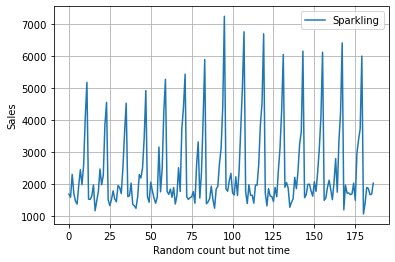

In [8]:
plt.figure(figsize = (18, 8))
df.plot();
plt.xlabel('Random count but not time')
plt.ylabel('Sales')
plt.grid()


#### Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the X-Axis as a Time Series, we need to pass the date range manually through a command in Pandas.

In [9]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [10]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [11]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df.head()



YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

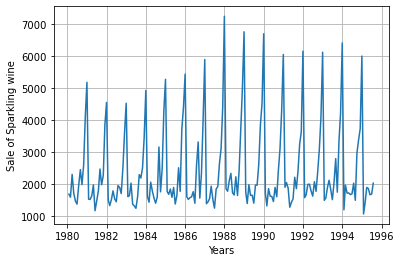

In [12]:
plt.plot(df['Time_Stamp'],df['Sparkling']);
plt.grid()
plt.xlabel('Years');
plt.ylabel('Sale of Sparkling wine');

#### Now that we have seen how to load the data from a '.csv' file as a Time Series object, let us go ahead and analyse the Time Series plot that we got.

#### We notice that there is no trend . There is some kind of seasonality in the data as well.

In [13]:
df.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

### Plot a year on year boxplot for the beer production.

#### Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

In [14]:
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    object        
 1   Sparkling   187 non-null    int64         
 2   Time_Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.5+ KB


In [16]:
df.set_index(keys = 'Time_Stamp', drop=True, inplace=True)
df.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [17]:
df.drop(labels = 'YearMonth', inplace=True, axis =1)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

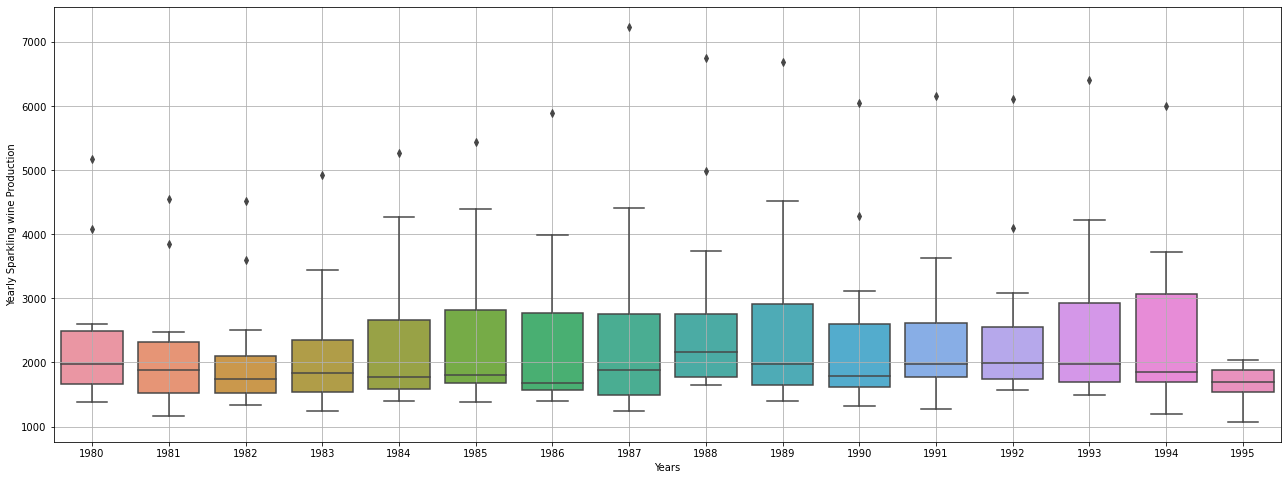

In [18]:
fig =plt.subplots(figsize = (22,8))
#fig,ax =plt.subplots(figsize = (22,8))
#sns.boxplot(df.index.years, df, ax=ax, whis=1.5)
sns.boxplot(x=df.index.year,y=df['Sparkling'])
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Sparkling wine Production');


### Plot a monthly boxplot for the beer production taking all the years into account.

#### Since this is a monthly data, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers for every month across all the years, if any.

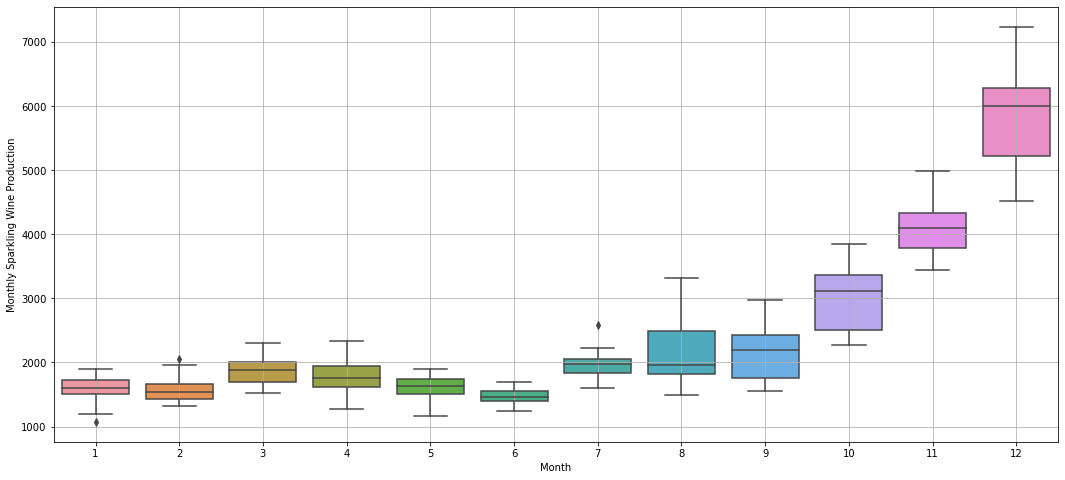

In [19]:
#fig, ax =plt.subplots(figsize = (22,8))
#fig,  =plt.subplots(figsize = (22,8))
plt.figure(figsize = (18, 8))
sns.boxplot(x=df.index.month,y=df['Sparkling'])
#sns.boxplot(df.index.month, df, ax=ax, whis=1.5)
plt.grid();
plt.xlabel('Month');
plt.ylabel('Monthly Sparkling Wine Production');

### Plot a monthplot of the give Time Series.

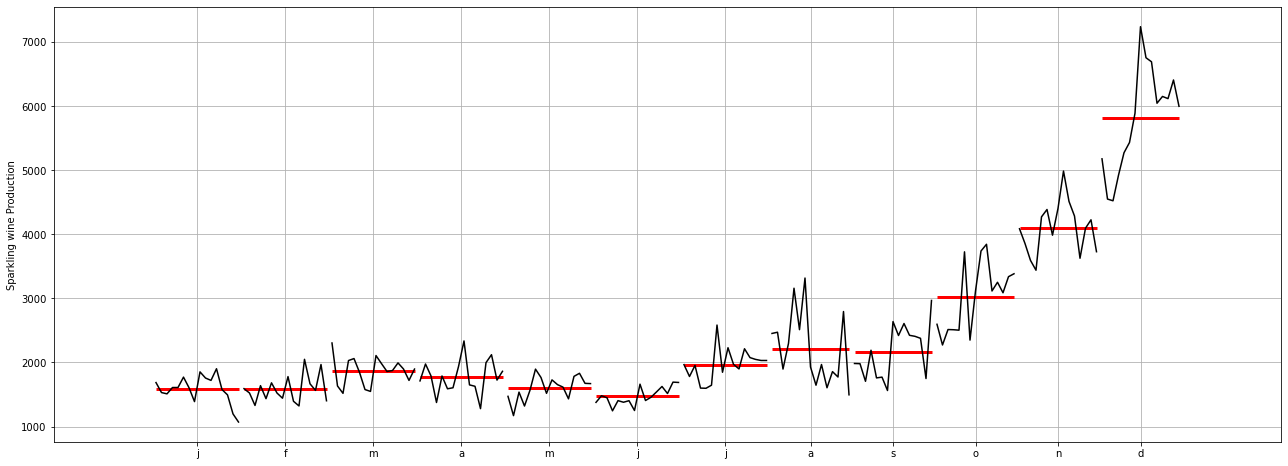

In [20]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (22,8))
month_plot(df, ylabel = 'Sparkling wine Production', ax=ax)
plt.grid();

In [21]:
## Plot the Empirical Cumulative Distribution.


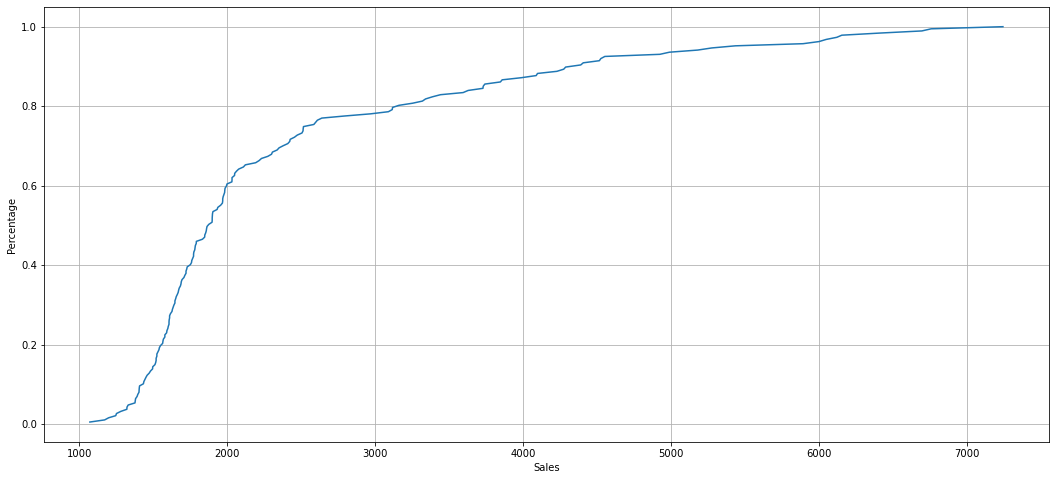

In [22]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.ylabel('Percentage')
plt.xlabel('Sales');

In [23]:
yearly_sales_across_months = pd.pivot_table(df, values = 'Sparkling', columns=df.index.month, index =df.index.year)
yearly_sales_across_months

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

In [24]:
#Plot the average RetailSales per month and the month on month percentage change of RetailSales.

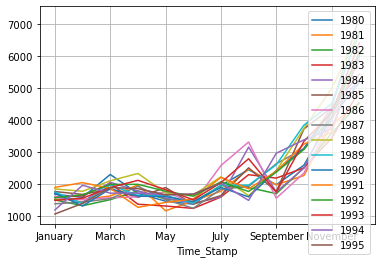

In [25]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
          'November', 'December'] 
yearly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.year,
                                           index = df.index.month_name()) 
yearly_sales_across_years = yearly_sales_across_years.reindex(index = months) 
yearly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

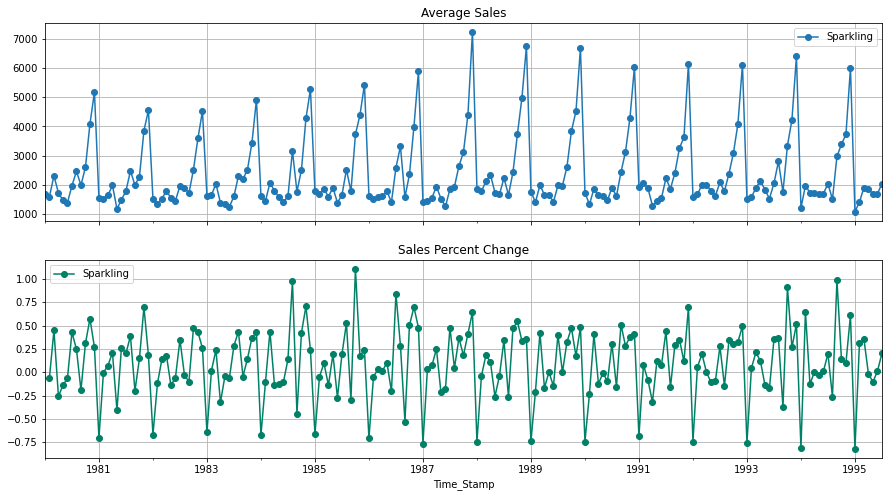

In [26]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

In [27]:
df.isna().sum()

Sparkling    0
dtype: int64

Text(0, 0.5, 'Sales')

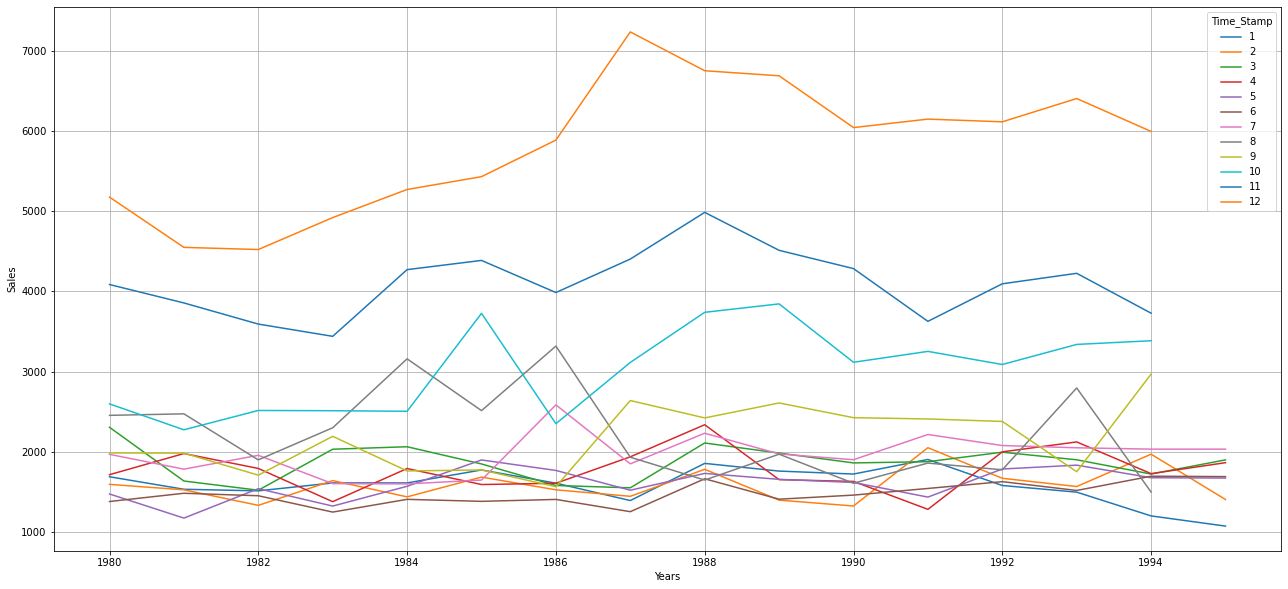

In [28]:
fig, ax = plt.subplots(figsize = (22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();
plt.xlabel('Years')
plt.ylabel('Sales')

In [29]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Sparkling
Time_Stamp           
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

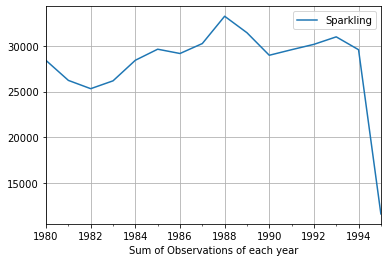

In [30]:
df_yearly_sum.plot();
plt.grid();
plt.xlabel('Sum of Observations of each year');

In [31]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

Sparkling
Time_Stamp             
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

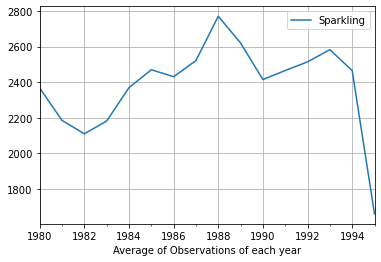

In [32]:
df_yearly_mean.plot();
plt.grid();
plt.xlabel('Average of Observations of each year');

In [33]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Sparkling
Time_Stamp           
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

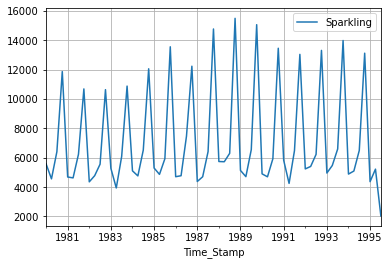

In [34]:
df_quarterly_sum.plot();
plt.grid()

In [35]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
Time_Stamp             
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

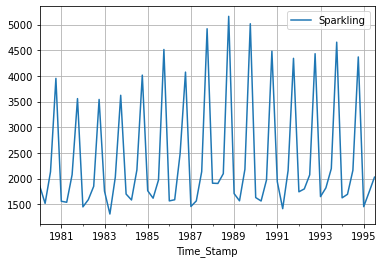

In [36]:
df_quarterly_mean.plot();
plt.grid()

In [37]:
df_daily_sum = df.resample('D').sum()
df_daily_sum.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-01          0
1980-02-02          0
1980-02-03          0
1980-02-04          0

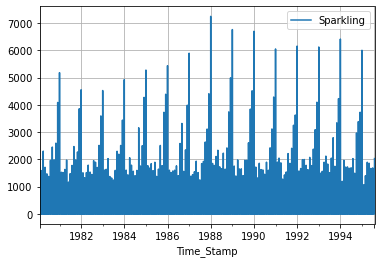

In [38]:
df_daily_sum.plot()
plt.grid();

#### The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

#### To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

In [39]:
df_decade_sum = df.resample('10Y').sum()
df_decade_sum.head()

Sparkling
Time_Stamp           
1980-12-31      28406
1990-12-31     288893
2000-12-31     131953

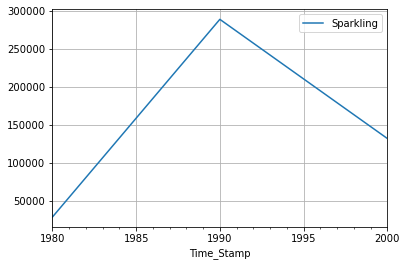

In [40]:
df_decade_sum.plot()
plt.grid();

### Decompose the Time Serie

#### Additive Model

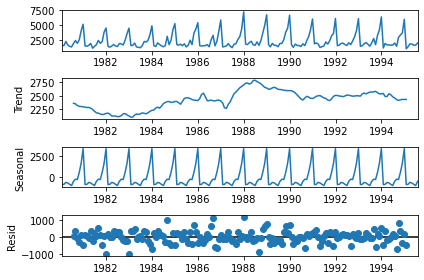

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model = 'additive')
decomposition.plot();

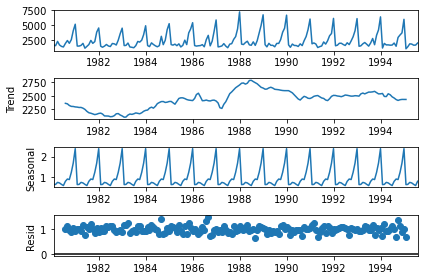

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model = 'multiplicative')
decomposition.plot();

In [43]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.tail(12),'\n')
print('Seasonality','\n',seasonality.tail(12),'\n')
print('Residual','\n',residual.tail(12),'\n')

Trend 
 Time_Stamp
1994-08-31    2431.166667
1994-09-30    2414.958333
1994-10-31    2428.041667
1994-11-30    2433.583333
1994-12-31    2433.208333
1995-01-31    2433.000000
1995-02-28            NaN
1995-03-31            NaN
1995-04-30            NaN
1995-05-31            NaN
1995-06-30            NaN
1995-07-31            NaN
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1994-08-31    0.918822
1994-09-30    0.894367
1994-10-31    1.241789
1994-11-30    1.690158
1994-12-31    2.384776
1995-01-31    0.649843
1995-02-28    0.659214
1995-03-31    0.757440
1995-04-30    0.730351
1995-05-31    0.660609
1995-06-30    0.603468
1995-07-31    0.809164
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1994-08-31    0.669260
1994-09-30    1.374165
1994-10-31    1.122677
1994-11-30    0.906607
1994-12-31    1.033837
1995-01-31    0.676758
1995-02-28         NaN
1995-03-31         NaN
1995-04-30         NaN
1995-05-31         NaN
1995-06-30         NaN
1995-07-31         NaN
Name: r

In [44]:
Seasonal_Ind = pd.DataFrame({'Jan':round(decomposition.seasonal.head(12),2).values[0], 
                             'Feb':round(decomposition.seasonal.head(12),2).values[1], 
                             'Mar':round(decomposition.seasonal.head(12),2).values[2], 
                             'Apr':round(decomposition.seasonal.head(12),2).values[3], 
                             'May':round(decomposition.seasonal.head(12),2).values[4], 
                             'Jun':round(decomposition.seasonal.head(12),2).values[5], 
                             'Jul':round(decomposition.seasonal.head(12),2).values[6], 
                             'Aug':round(decomposition.seasonal.head(12),2).values[7], 
                             'Sep':round(decomposition.seasonal.head(12),2).values[8], 
                             'Oct':round(decomposition.seasonal.head(12),2).values[9], 
                             'Nov':round(decomposition.seasonal.head(12),2).values[10], 
                             'Dec':round(decomposition.seasonal.head(12),2).values[11]}, 
                            index=range(1,2)) 
Seasonal_Ind

Jan   Feb   Mar   Apr   May  Jun   Jul   Aug   Sep   Oct   Nov   Dec
1  0.65  0.66  0.76  0.73  0.66  0.6  0.81  0.92  0.89  1.24  1.69  2.38

## Split the data into train and test and plot the training and test data.
Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [45]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [46]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [47]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [48]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


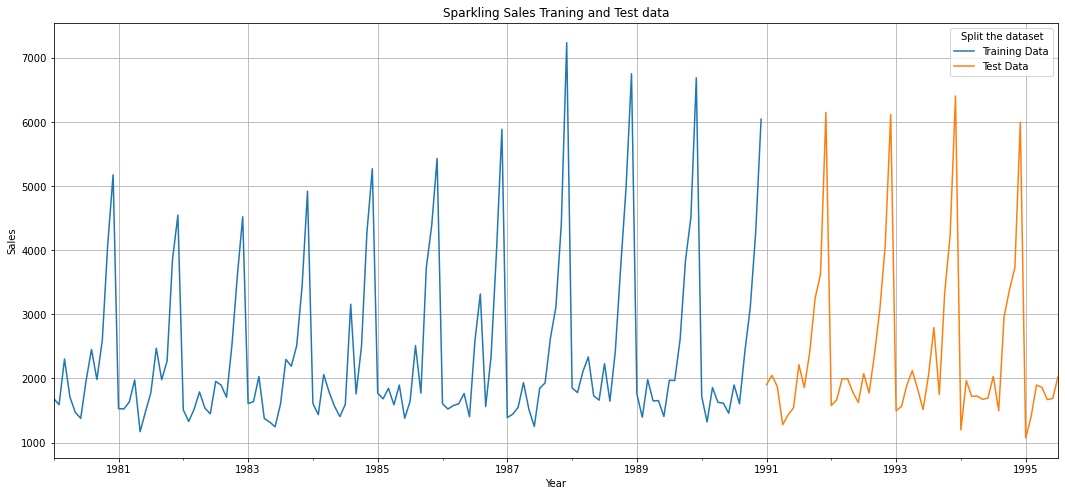

In [49]:
plt.figure(figsize = (18, 8))
train['Sparkling'].plot() 
test['Sparkling'].plot() 
plt.grid() 
plt.title('Sparkling Sales Traning and Test data') 
plt.xlabel('Year') 
plt.ylabel('Sales') 
plt.legend(['Training Data','Test Data'],title='Split the dataset');

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [50]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)

print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


#### We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [51]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [52]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



#### Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

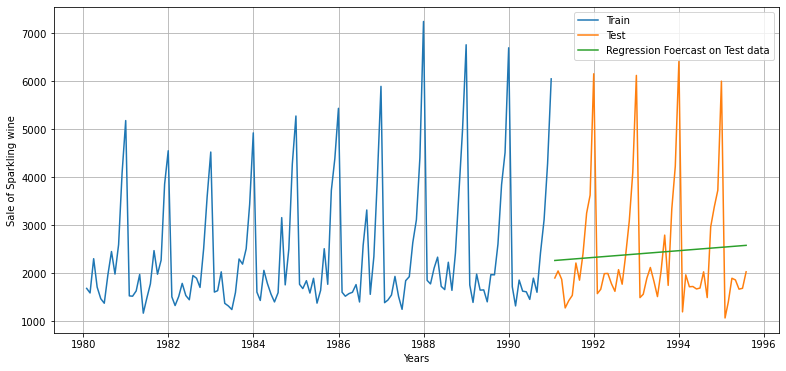

In [56]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression Foercast on Test data')
plt.xlabel('Years');
plt.ylabel('Sale of Sparkling wine');
plt.legend(loc='best')
plt.grid();

In [57]:
from sklearn import metrics

In [58]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


In [59]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1275.867052

### Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [60]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [61]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

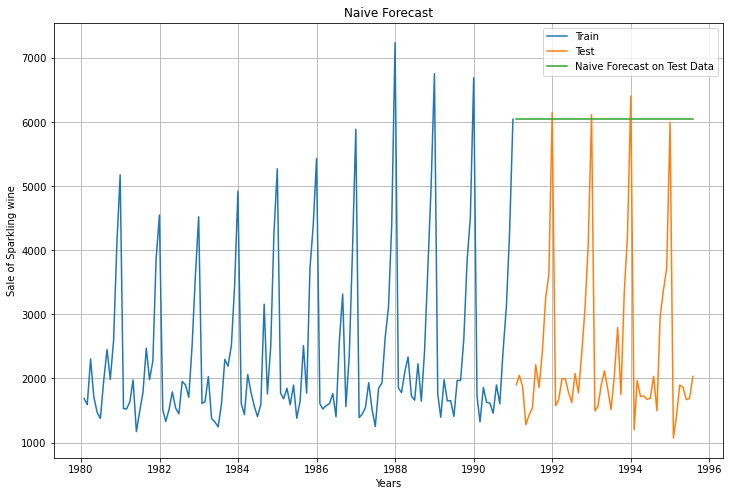

In [62]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.xlabel('Years');
plt.ylabel('Sale of Sparkling wine');
plt.grid();

In [63]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [64]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1275.867052
NaiveModel        3864.279352

## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [65]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [66]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

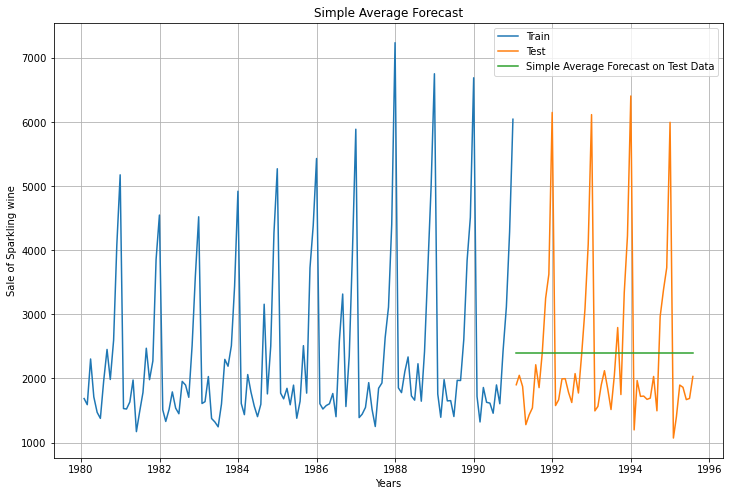

In [67]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.xlabel('Years');
plt.ylabel('Sale of Sparkling wine');
plt.grid();

In [68]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [69]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1275.867052
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

### Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
#### For Moving Average, we are going to average over the entire data.

In [70]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [71]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

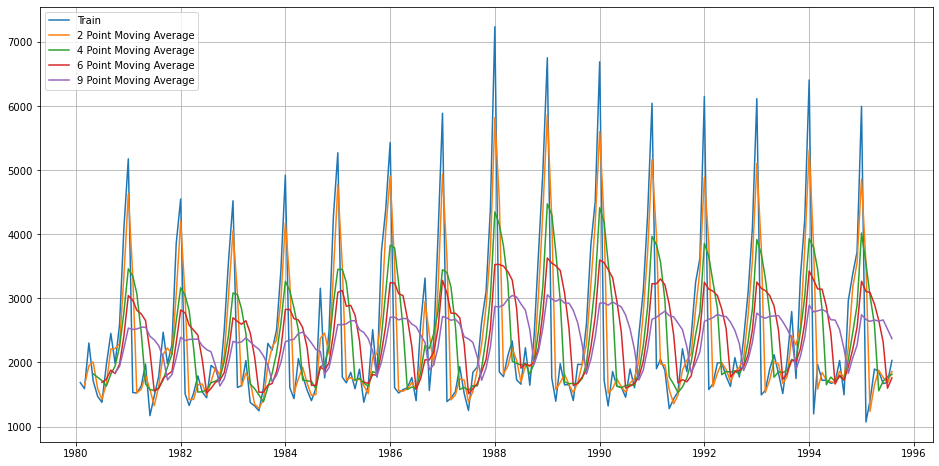

In [72]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [73]:
#Creating train and test set 
trailing_MovingAverage_train= MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test= MovingAverage[MovingAverage.index.year >= 1991] 

trailing_MovingAverage_test.head()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Stamp                                                             
1991-01-31       1902      3974.5     3837.75  3230.000000  2705.666667
1991-02-28       2049      1975.5     3571.00  3304.000000  2753.888889
1991-03-31       1874      1961.5     2968.00  3212.333333  2800.222222
1991-04-30       1279      1576.5     1776.00  2906.166667  2731.333333
1991-05-31       1432      1355.5     1658.50  2430.500000  2712.111111

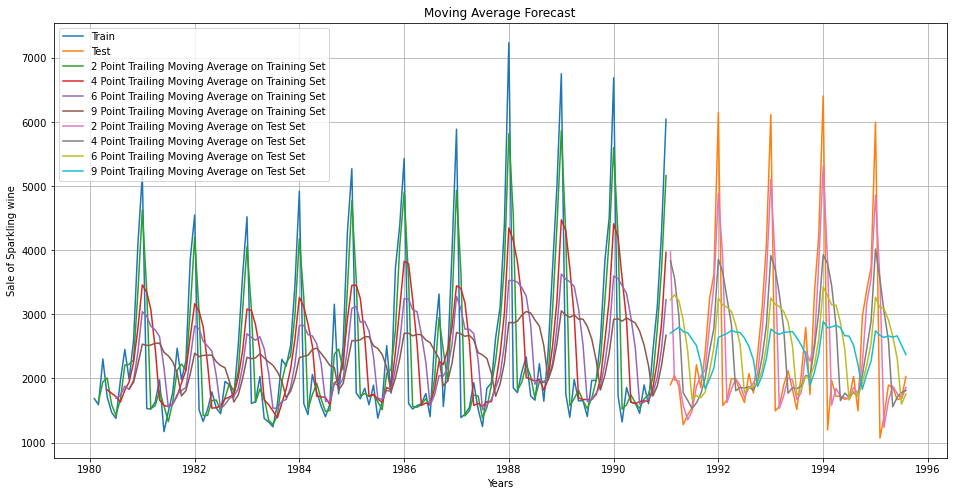

In [74]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.title("Moving Average Forecast")
plt.xlabel('Years');
plt.ylabel('Sale of Sparkling wine');
plt.grid();

In [75]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [76]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1275.867052
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

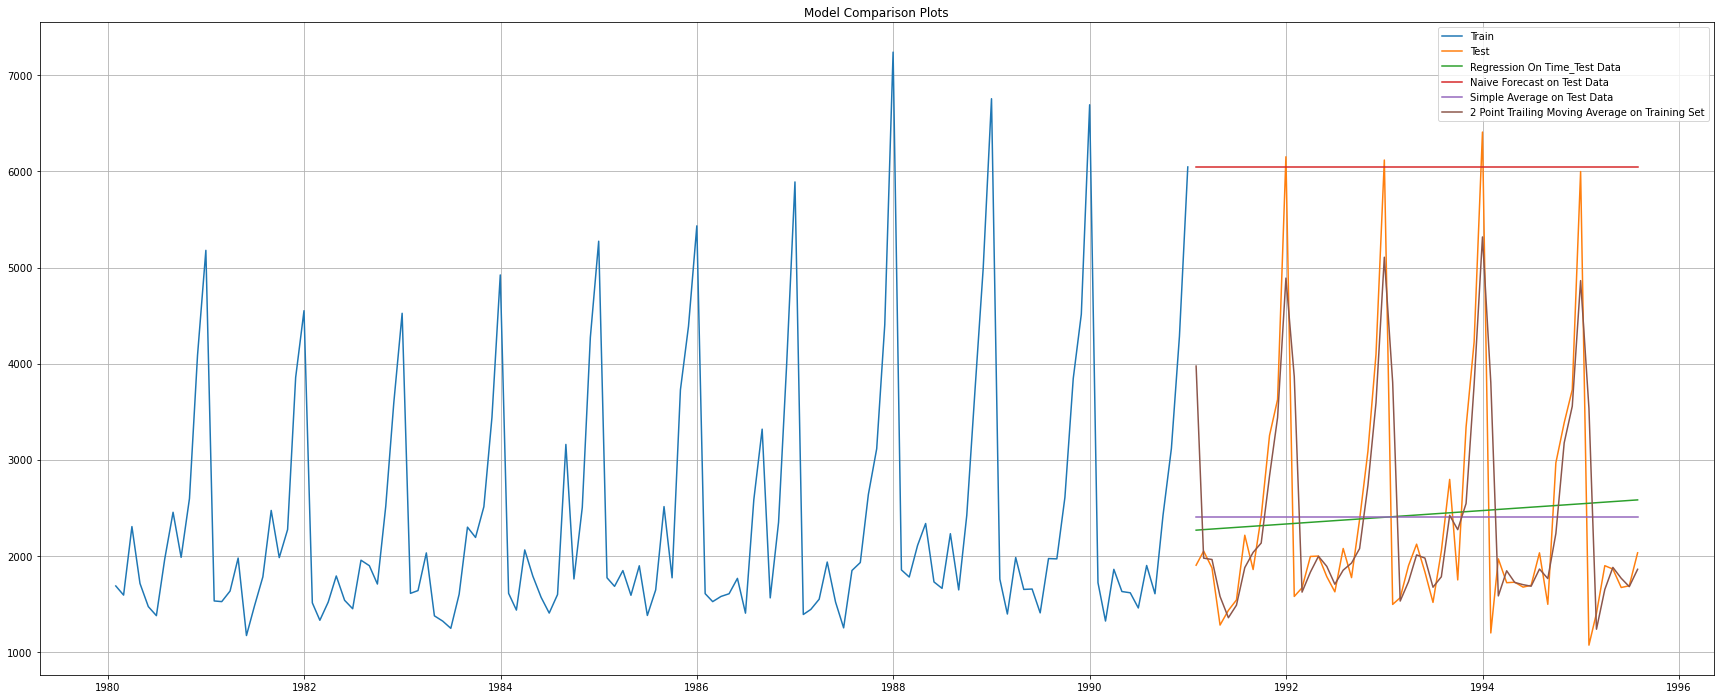

In [77]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Method 5: Simple Exponential Smoothing

In [78]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [79]:
SES_train = train.copy()
SES_test = test.copy()


In [80]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [81]:
model_SES_autofit = model_SES.fit(optimized=True)

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [82]:
model_SES_autofit.params

{'smoothing_level': 0.049606598807459296,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435304,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [83]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2724.929339
1991-02-28       2049  2724.929339
1991-03-31       1874  2724.929339
1991-04-30       1279  2724.929339
1991-05-31       1432  2724.929339

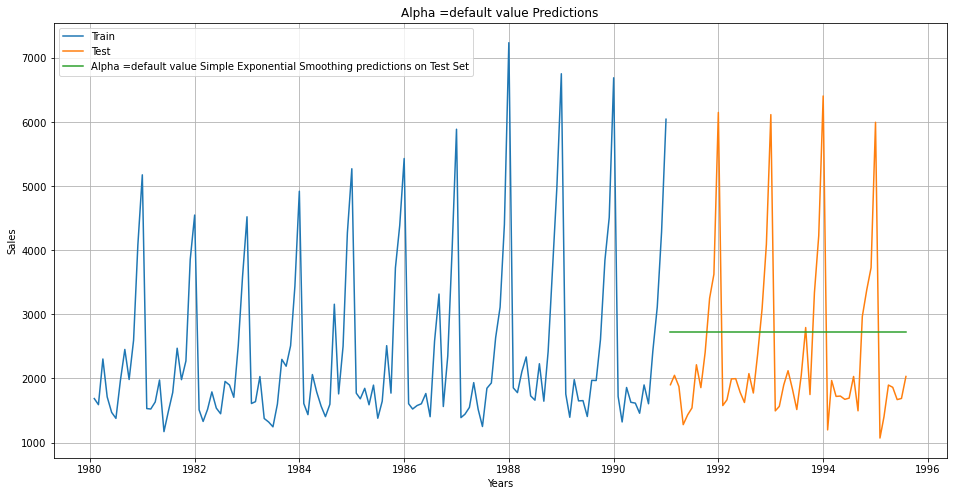

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =default value Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Alpha =default value Predictions');

### Model Evaluation for  𝛼  = default value : Simple Exponential Smoothing

In [85]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =default value Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =default value Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [86]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=default value,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                                1275.867052
NaiveModel                                      3864.279352
SimpleAverageModel                              1275.081804
2pointTrailingMovingAverage                      813.400684
4pointTrailingMovingAverage                     1156.589694
6pointTrailingMovingAverage                     1283.927428
9pointTrailingMovingAverage                     1346.278315
Alpha=default value,SimpleExponentialSmoothing  1316.034674

#### Setting different alpha values.
#### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [87]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [88]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)


In [89]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.3  1359.511747  1935.507132
1           0.4  1352.588879  2311.919615
2           0.5  1344.004369  2666.351413
3           0.6  1338.805381  2979.204388
4           0.7  1338.844308  3249.944092
5           0.8  1344.462091  3483.801006
6           0.9  1355.723518  3686.794285

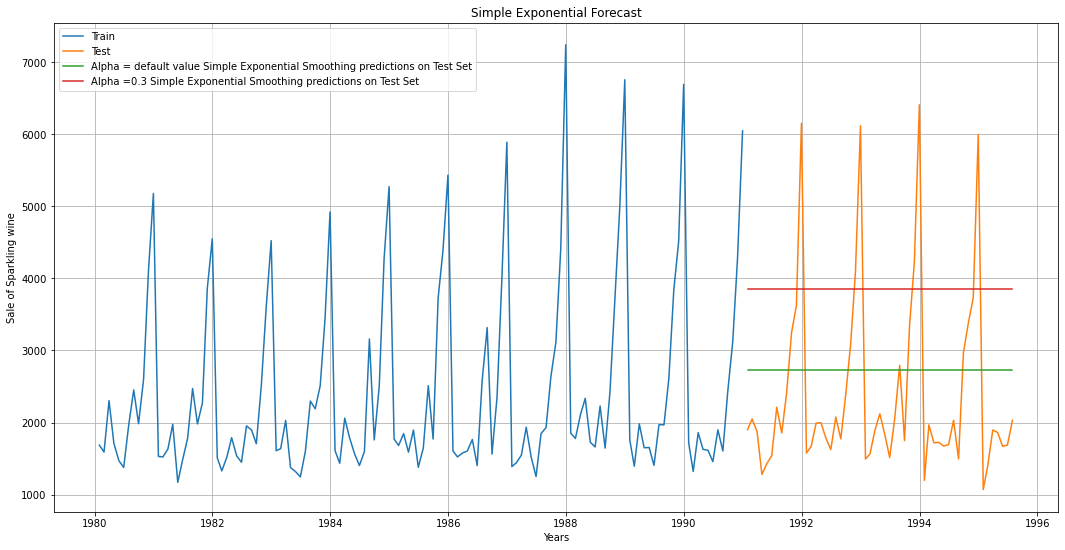

In [90]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha = default value Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.title("Simple Exponential Forecast")
plt.xlabel('Years');
plt.ylabel('Sale of Sparkling wine');
plt.grid();

In [91]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
2pointTrailingMovingAverage                      813.400684
4pointTrailingMovingAverage                     1156.589694
SimpleAverageModel                              1275.081804
RegressionOnTime                                1275.867052
6pointTrailingMovingAverage                     1283.927428
Alpha=default value,SimpleExponentialSmoothing  1316.034674
9pointTrailingMovingAverage                     1346.278315
Alpha=0.3,SimpleExponentialSmoothing            1935.507132
NaiveModel                                      3864.279352

### Method 6: Double Exponential Smoothing (Holt's Model)
#### Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [92]:
DES_train = train.copy()
DES_test = test.copy()

In [93]:
model_DES = Holt(DES_train['Sparkling'])

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [94]:
model_DES_autofit = model_DES.fit(optimized=True)

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [95]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  5221.278699
1991-02-28       2049  5127.886554
1991-03-31       1874  5034.494409
1991-04-30       1279  4941.102264
1991-05-31       1432  4847.710119

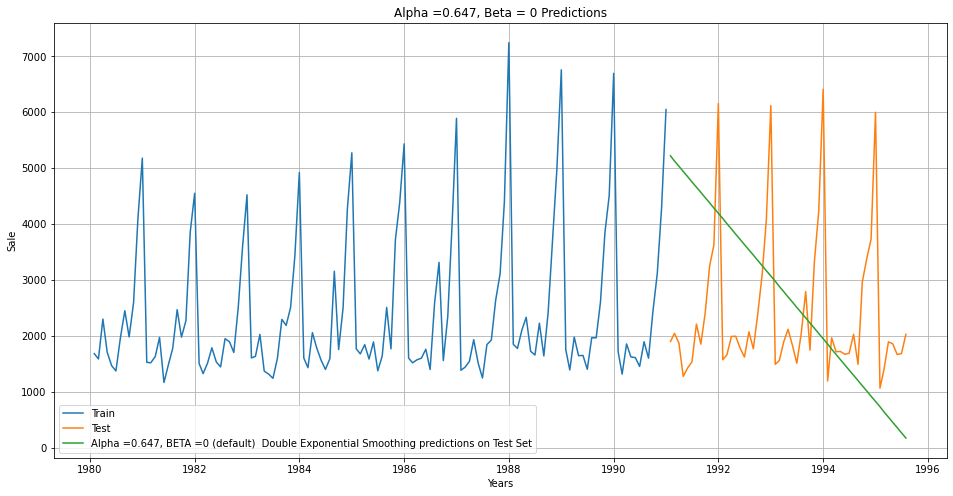

In [97]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.647, BETA =0 (default)  Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.xlabel('Years')
plt.ylabel('Sale')
plt.title('Alpha =0.647, Beta = 0 Predictions');

In [98]:
rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha=0.647,Beta=0 (default) Double Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.647,Beta=0 (default) Double Exponential Smoothing Model forecast on the Test Data,  RMSE is 2007.239


In [99]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.647,Beta=0,default DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=default value,SimpleExponentialSmoothing      1316.034674
Alpha=0.3,SimpleExponentialSmoothing                1935.507132
Alpha=0.647,Beta=0,default DoubleExponentialSmo...  2007.238526

In [100]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [101]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

<ipython-input-101-a799aca5fa48>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-101-a799aca5fa48>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-101-a799aca5fa48>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-101-a799aca5fa48>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-101-a799aca5fa48>:3: FutureWarning: the '

<ipython-input-101-a799aca5fa48>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-101-a799aca5fa48>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-101-a799aca5fa48>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-101-a799aca5fa48>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-101-a799aca5fa48>:3: FutureWarning: the '

In [102]:
resultsDf_7.head()

Alpha Values  Beta Values   Train RMSE     Test RMSE
0           0.3          0.3  1592.292788  18259.110704
1           0.3          0.4  1682.573828  26069.841401
2           0.3          0.5  1771.710791  34401.512440
3           0.3          0.6  1848.576510  42162.748095
4           0.3          0.7  1899.949006  47832.397419

In [103]:
#Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [104]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
8            0.4          0.3  1569.338606  23878.496940
1            0.3          0.4  1682.573828  26069.841401
16           0.5          0.3  1530.575845  27095.532414
24           0.6          0.3  1506.449870  29070.722592

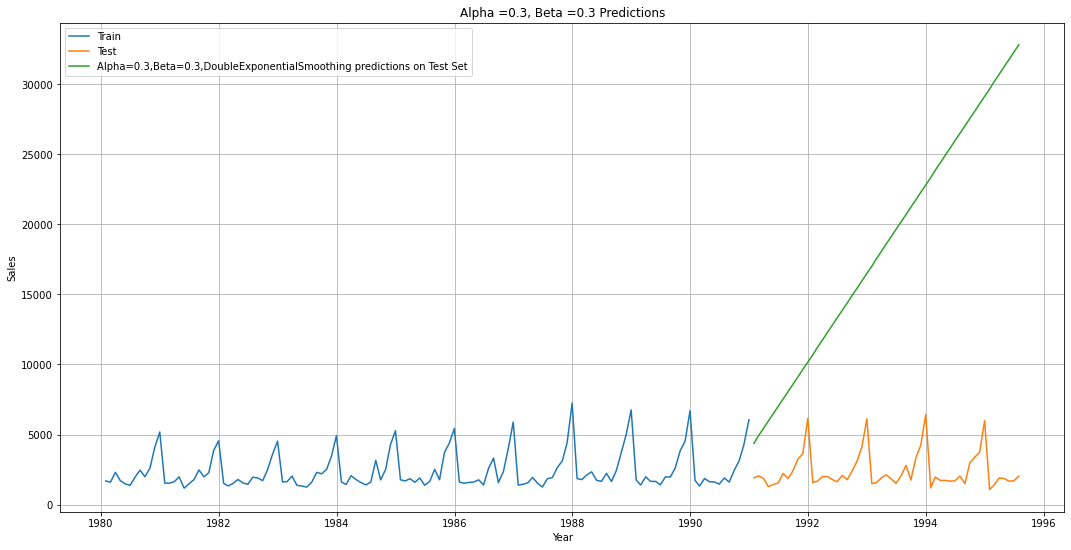

In [105]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.xlabel('Year')
plt.ylabel('Sales')

plt.legend(loc='best')
plt.grid();
plt.title('Alpha =0.3, Beta =0.3 Predictions');

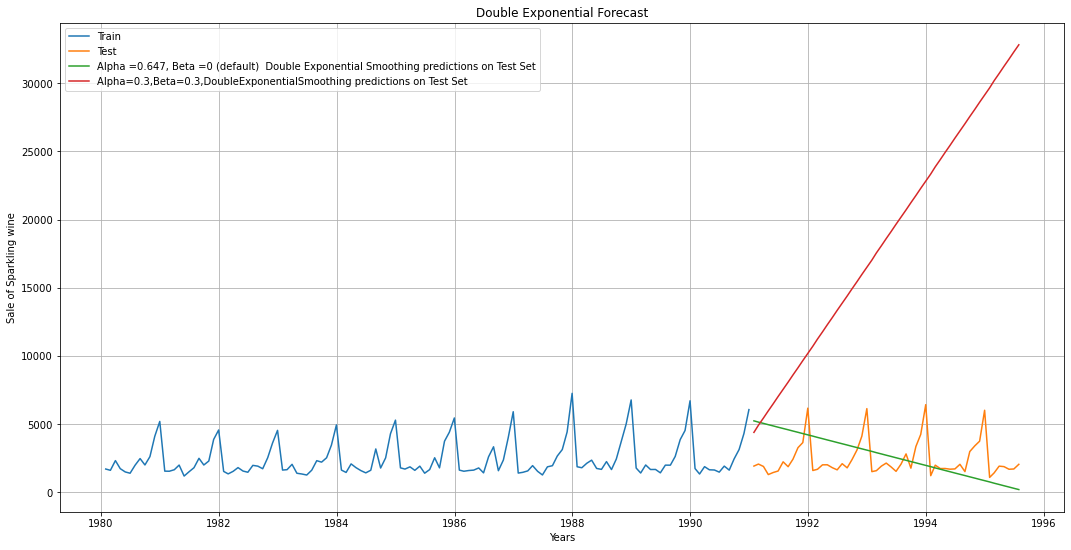

In [106]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.647, Beta =0 (default)  Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title("Double Exponential Forecast")
plt.xlabel('Years');
plt.ylabel('Sale of Sparkling wine');
plt.grid();

In [107]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=default value,SimpleExponentialSmoothing       1316.034674
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.647,Beta=0,default DoubleExponentialSmo...   2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)
#### Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [108]:
TES_train = train.copy()
TES_test = test.copy()

In [109]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [110]:
model_TES_autofit = model_TES.fit()

In [111]:
model_TES_autofit.params

{'smoothing_level': 0.11107193639676448,
 'smoothing_trend': 0.06170661554551025,
 'smoothing_seasonal': 0.39507938025204126,
 'damping_trend': nan,
 'initial_level': 1640.0001849429073,
 'initial_trend': -15.111380527844805,
 'initial_seasons': array([1.03314765, 0.98921937, 1.40520416, 1.20124958, 0.93920975,
        0.95169819, 1.29579418, 1.68037583, 1.35792845, 1.79419758,
        2.82688557, 3.60017043]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [112]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1577.246443
1991-02-28       2049   1333.624267
1991-03-31       1874   1746.041391
1991-04-30       1279   1630.569083
1991-05-31       1432   1523.309244

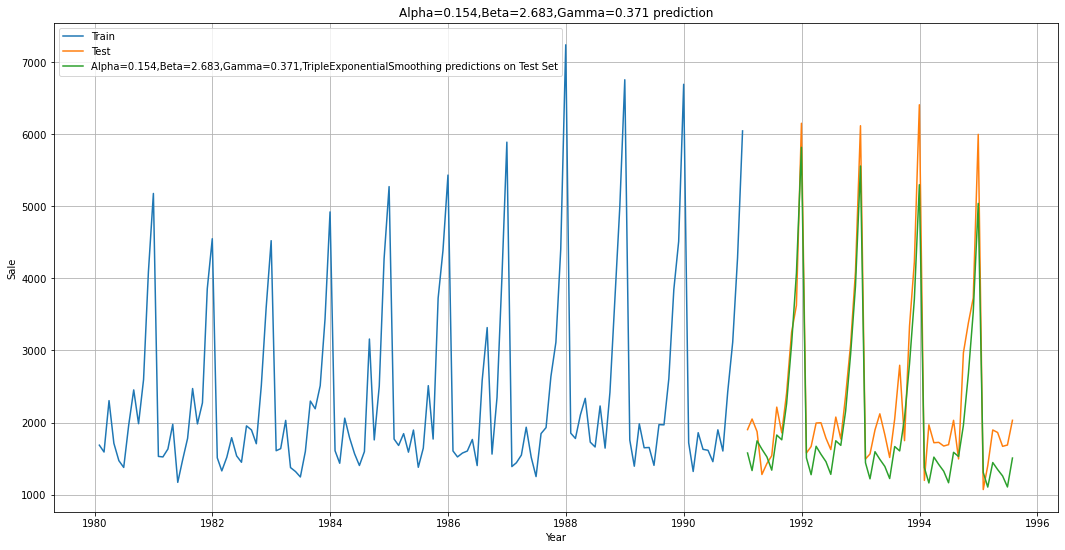

In [113]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.154,Beta=2.683,Gamma=0.371,TripleExponentialSmoothing predictions on Test Set')

plt.xlabel('Year')
plt.ylabel('Sale')
plt.legend(loc='best')
plt.title('Alpha=0.154,Beta=2.683,Gamma=0.371 prediction')
plt.grid();

In [114]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.154,Beta=2.683,Gamma=0.371, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.154,Beta=2.683,Gamma=0.371, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.592


In [115]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.154,Beta=2.683,Gamma=0.371,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=default value,SimpleExponentialSmoothing       1316.034674
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.647,Beta=0,default DoubleExponentialSmo...   2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.154,Beta=2.683,Gamma=0.371,TripleExpone...    469.591666

In [116]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [117]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-117-b0523895753d>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

In [118]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
0             0.3          0.3           0.3  404.513320  392.786198
8             0.3          0.4           0.3  424.828055  410.854547
65            0.4          0.3           0.4  435.553595  421.409170
296           0.7          0.8           0.3  700.317756  518.188752
130           0.5          0.3           0.5  498.239915  542.175497

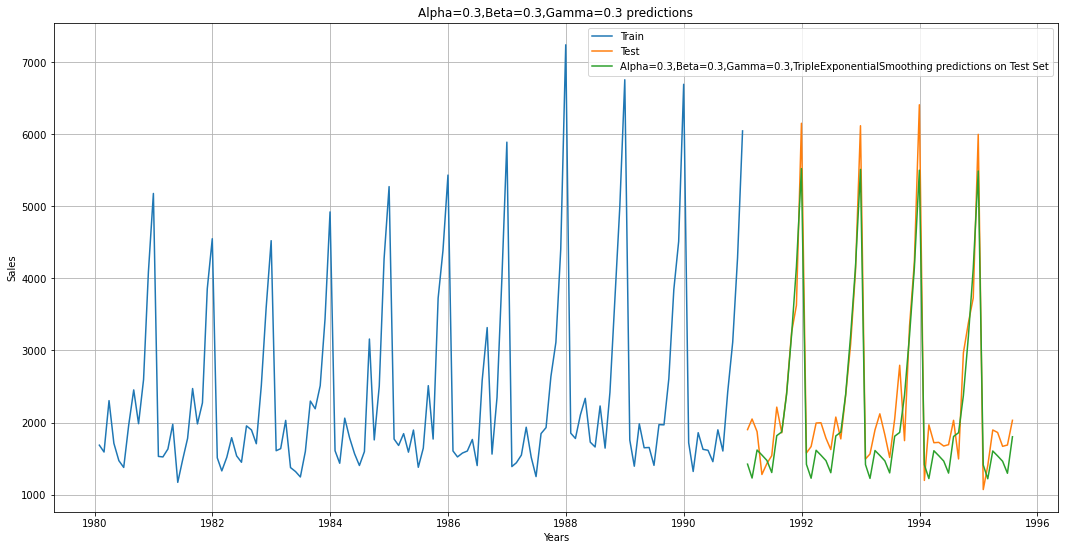

In [119]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Alpha=0.3,Beta=0.3,Gamma=0.3 predictions')
plt.grid();

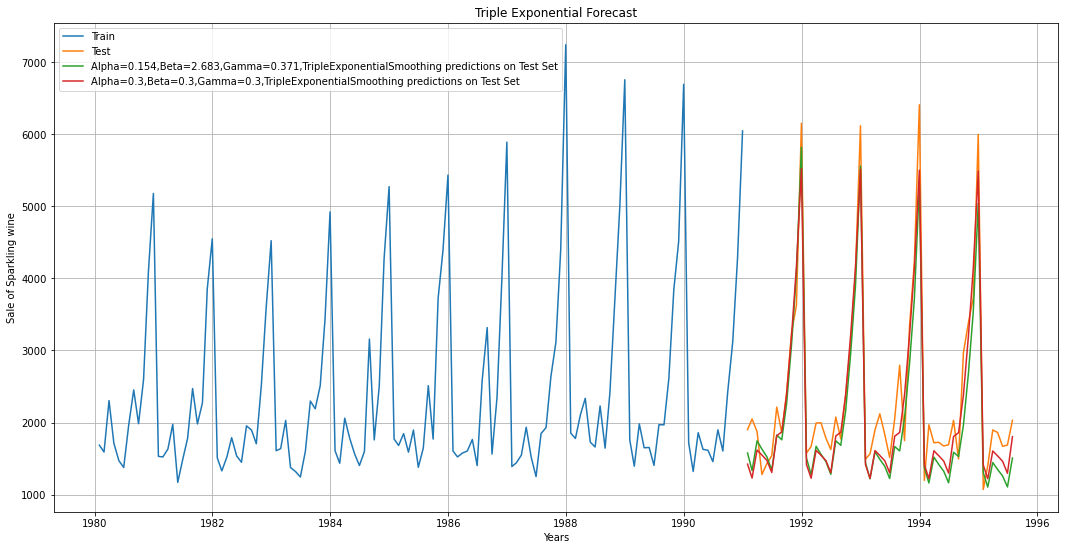

In [120]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.154,Beta=2.683,Gamma=0.371,TripleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title("Triple Exponential Forecast")
plt.xlabel('Years');
plt.ylabel('Sale of Sparkling wine');
plt.grid();

In [121]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                     1275.867052
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=default value,SimpleExponentialSmoothing       1316.034674
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.647,Beta=0,default DoubleExponentialSmo...   2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.154,Beta=2.683,Gamma=0.371,TripleExpone...    469.591666
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198

In [122]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
Alpha=0.154,Beta=2.683,Gamma=0.371,TripleExpone...    469.591666
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
SimpleAverageModel                                   1275.081804
RegressionOnTime                                     1275.867052
6pointTrailingMovingAverage                          1283.927428
Alpha=default value,SimpleExponentialSmoothing       1316.034674
9pointTrailingMovingAverage                          1346.278315
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.647,Beta=0,default DoubleExponentialSmo...   2007.238526
NaiveModel                                           3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

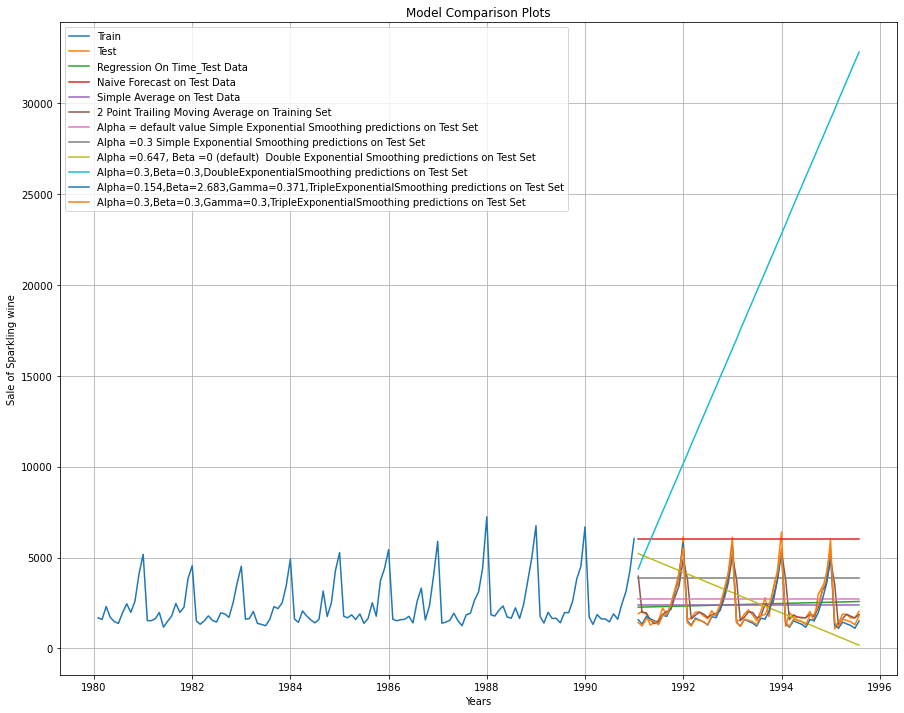

In [123]:
## Plotting on both Training and Test data

plt.figure(figsize=(15,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(SES_test['predict'], label='Alpha = default value Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict'], label='Alpha =0.647, Beta =0 (default)  Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.154,Beta=2.683,Gamma=0.371,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.xlabel('Years');
plt.ylabel('Sale of Sparkling wine');

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Check for stationarity of the whole Time Series data.

In [124]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Years')
    plt.ylabel('Sales')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
    

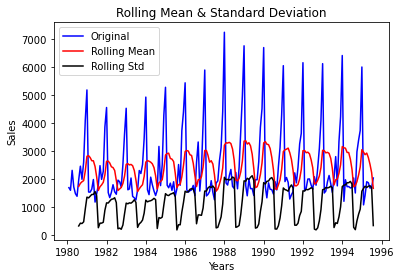

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [125]:
test_stationarity(df['Sparkling'])

In [126]:
#We see that at 5% significant level the Time Series is non-stationary.
#Let us take a difference of order 1 and check whether the Time Series is stationary or not.

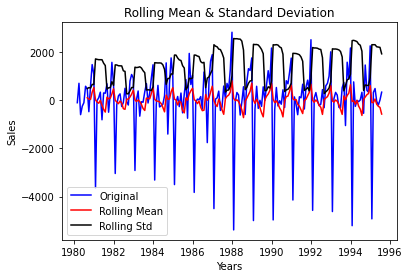

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [127]:
test_stationarity(df['Sparkling'].diff().dropna())

In [128]:
# We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [129]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

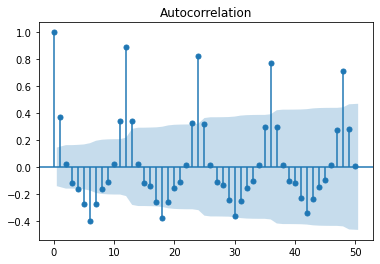

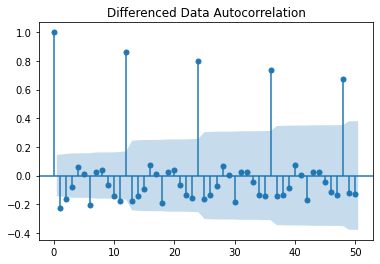

In [130]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


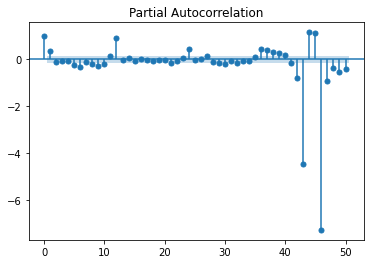

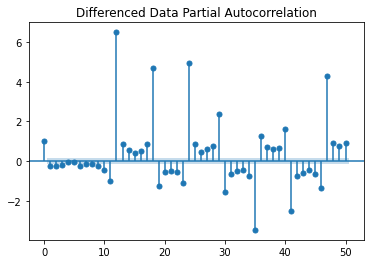

In [131]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [132]:
# From the above plots, we can say that there seems to be a seasonality in the data.

### Split the data into train and test and plot the training and test data.

In [133]:
# Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [134]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [135]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [136]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [137]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### Check for stationarity of the Training Data Time Series.

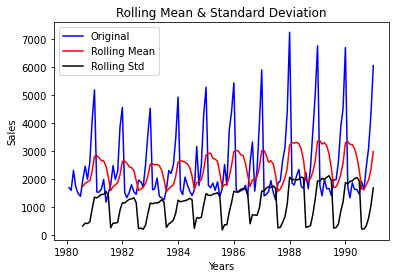

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [138]:
test_stationarity(train['Sparkling'])

In [139]:
# We see that the series is not stationary at  𝛼  = 0.05.

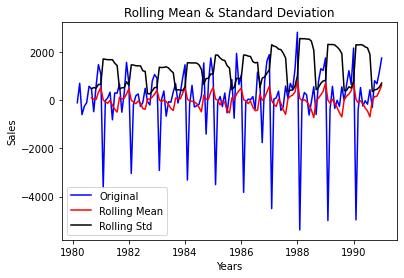

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [140]:
test_stationarity(train['Sparkling'].diff().dropna())

In [141]:

#We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [142]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [143]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [144]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 1) - AIC:2264.9064372716052
ARIMA(0, 1, 2) - AIC:2232.783097684338
ARIMA(1, 1, 0) - AIC:2268.5280614409007


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

ARIMA(1, 1, 1) - AIC:2235.013945354085
ARIMA(1, 1, 2) - AIC:2233.5976471202684
ARIMA(2, 1, 0) - AIC:2262.0356009540687


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 1) - AIC:2232.360489902149
ARIMA(2, 1, 2) - AIC:2210.6215751505047


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
           

In [145]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.621575
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035601
1  (0, 1, 1)  2264.906437
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [146]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.311
Method:                       css-mle   S.D. of innovations           1013.266
Date:                Sat, 18 Sep 2021   AIC                           2210.622
Time:                        20:18:24   BIC                           2227.873
Sample:                    02-29-1980   HQIC                          2217.632
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5850      0.518     10.774      0.000       4.569       6.601
ar.L1.D.Sparkling     1.2701      0.075     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
           

### Predict on the Test Set using this model and evaluate the model.

In [147]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [148]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.3364852048092


In [149]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

RMSE
ARIMA(2,1,2)  1374.336485

In [150]:
#results_auto_ARIMA.plot_diagnostics()
#plt.show()

### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

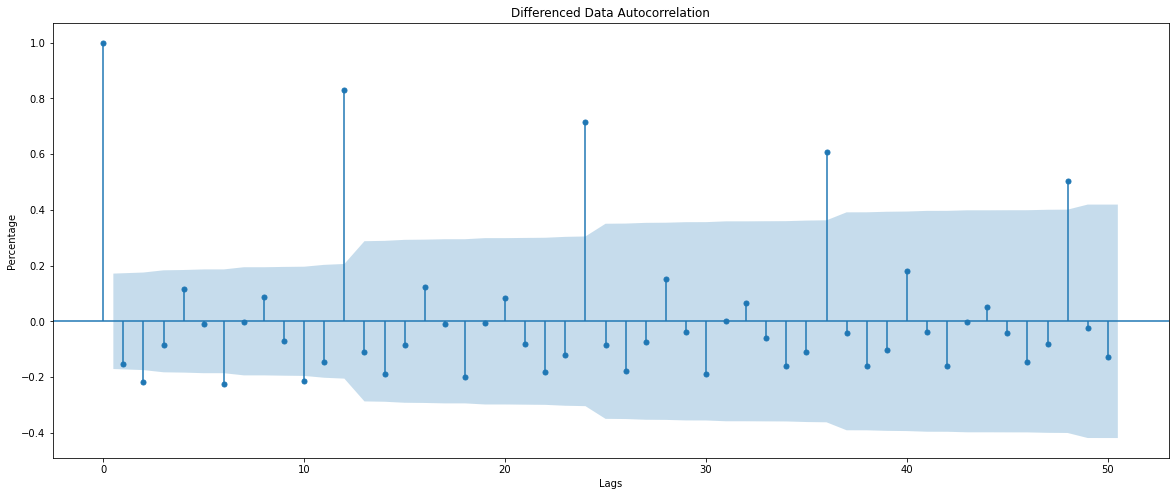

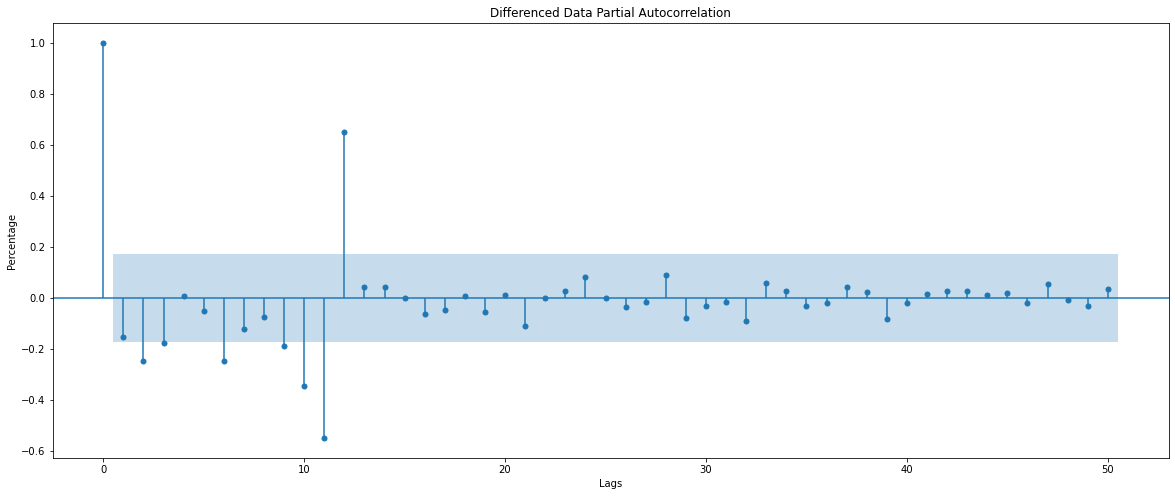

In [151]:

from pylab import rcParams
rcParams['figure.figsize'] = 20,8
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.xlabel('Lags')
plt.ylabel('Percentage')
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,method='ywmle',title='Differenced Data Partial Autocorrelation')
plt.xlabel('Lags')
plt.ylabel('Percentage')
plt.show()


In [152]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Sat, 18 Sep 2021   AIC                           2269.583
Time:                        20:18:25   BIC                           2275.333
Sample:                    02-29-1980   HQIC                          2271.919
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.782    -202.667     269.248


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


### Predict on the Test Set using this model and evaluate the model.

In [153]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [154]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

4779.15429919654


In [155]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)  1374.336485
ARIMA(0,1,0)  4779.154299

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

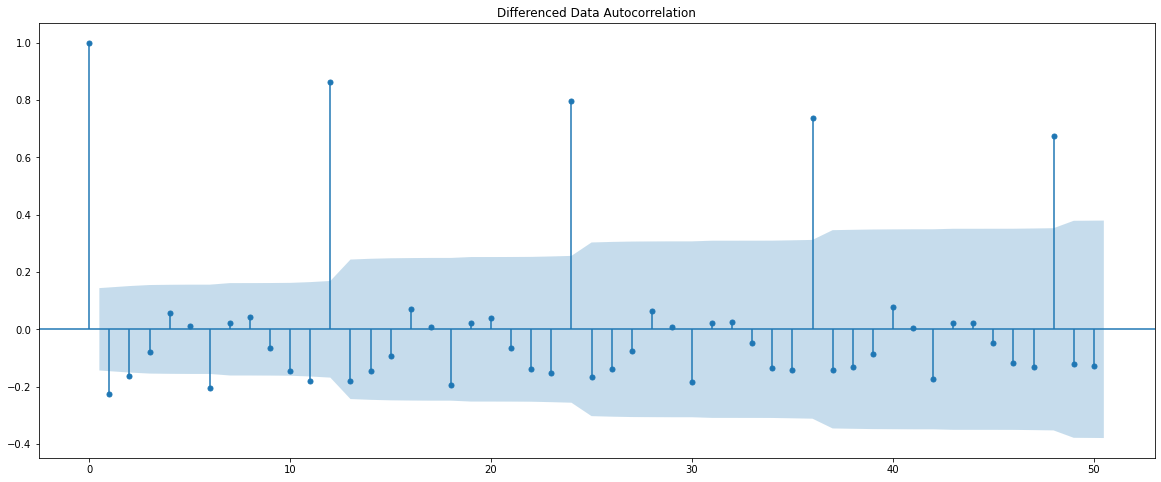

In [156]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [157]:
## We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality  12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [158]:
#import itertools
#p = q = range(0, 3)
#d= range(1,2)
#D = range(0,1)
#pdq = list(itertools.product(p, d, q))
#model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
#print('Examples of some parameter combinations for Model...')
#for i in range(1,len(pdq)):
#    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

In [159]:
import itertools
p = q = range(0, 4)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 6)
Model: (0, 0, 2)(0, 0, 2, 6)
Model: (0, 0, 3)(0, 0, 3, 6)
Model: (0, 1, 0)(0, 1, 0, 6)
Model: (0, 1, 1)(0, 1, 1, 6)
Model: (0, 1, 2)(0, 1, 2, 6)
Model: (0, 1, 3)(0, 1, 3, 6)
Model: (1, 0, 0)(1, 0, 0, 6)
Model: (1, 0, 1)(1, 0, 1, 6)
Model: (1, 0, 2)(1, 0, 2, 6)
Model: (1, 0, 3)(1, 0, 3, 6)
Model: (1, 1, 0)(1, 1, 0, 6)
Model: (1, 1, 1)(1, 1, 1, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (1, 1, 3)(1, 1, 3, 6)
Model: (2, 0, 0)(2, 0, 0, 6)
Model: (2, 0, 1)(2, 0, 1, 6)
Model: (2, 0, 2)(2, 0, 2, 6)
Model: (2, 0, 3)(2, 0, 3, 6)
Model: (2, 1, 0)(2, 1, 0, 6)
Model: (2, 1, 1)(2, 1, 1, 6)
Model: (2, 1, 2)(2, 1, 2, 6)
Model: (2, 1, 3)(2, 1, 3, 6)
Model: (3, 0, 0)(3, 0, 0, 6)
Model: (3, 0, 1)(3, 0, 1, 6)
Model: (3, 0, 2)(3, 0, 2, 6)
Model: (3, 0, 3)(3, 0, 3, 6)
Model: (3, 1, 0)(3, 1, 0, 6)
Model: (3, 1, 1)(3, 1, 1, 6)
Model: (3, 1, 2)(3, 1, 2, 6)
Model: (3, 1, 3)(3, 1, 3, 6)


In [160]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:2447.5387828489993
SARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:2316.2561971158034
SARIMA(0, 0, 0)x(0, 0, 2, 6) - AIC:2084.355362489063
SARIMA(0, 0, 0)x(0, 0, 3, 6) - AIC:1978.0897684798579
SARIMA(0, 0, 0)x(0, 1, 0, 6) - AIC:2280.5252252009495
SARIMA(0, 0, 0)x(0, 1, 1, 6) - AIC:2037.289636243737
SARIMA(0, 0, 0)x(0, 1, 2, 6) - AIC:1856.0024695681543
SARIMA(0, 0, 0)x(0, 1, 3, 6) - AIC:1719.6031554603987
SARIMA(0, 0, 0)x(1, 0, 0, 6) - AIC:2281.4566301751534
SARIMA(0, 0, 0)x(1, 0, 1, 6) - AIC:2151.915234006954
SARIMA(0, 0, 0)x(1, 0, 2, 6) - AIC:1965.4168471914852
SARIMA(0, 0, 0)x(1, 0, 3, 6) - AIC:1810.5968379709755
SARIMA(0, 0, 0)x(1, 1, 0, 6) - AIC:1802.0949415896628
SARIMA(0, 0, 0)x(1, 1, 1, 6) - AIC:1789.941566077119
SARIMA(0, 0, 0)x(1, 1, 2, 6) - AIC:1681.266213082917
SARIMA(0, 0, 0)x(1, 1, 3, 6) - AIC:1598.6299293568588
SARIMA(0, 0, 0)x(2, 0, 0, 6) - AIC:1804.0548045292603
SARIMA(0, 0, 0)x(2, 0, 1, 6) - AIC:1805.8994990342621
SARIMA(0, 0, 0)x(2, 0, 2, 6) - AI

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(3, 0, 0, 6) - AIC:1712.84488533276
SARIMA(0, 0, 2)x(3, 0, 1, 6) - AIC:1715.5266213966229
SARIMA(0, 0, 2)x(3, 0, 2, 6) - AIC:1697.8986345375852
SARIMA(0, 0, 2)x(3, 0, 3, 6) - AIC:1658.626848309733
SARIMA(0, 0, 2)x(3, 1, 0, 6) - AIC:1615.899332437027
SARIMA(0, 0, 2)x(3, 1, 1, 6) - AIC:1617.9056195718292
SARIMA(0, 0, 2)x(3, 1, 2, 6) - AIC:1615.222081507402
SARIMA(0, 0, 2)x(3, 1, 3, 6) - AIC:1574.9686039147778
SARIMA(0, 0, 3)x(0, 0, 0, 6) - AIC:2253.1381901874797
SARIMA(0, 0, 3)x(0, 0, 1, 6) - AIC:2152.8430394623024
SARIMA(0, 0, 3)x(0, 0, 2, 6) - AIC:1949.37182418004
SARIMA(0, 0, 3)x(0, 0, 3, 6) - AIC:1855.5683294793466
SARIMA(0, 0, 3)x(0, 1, 0, 6) - AIC:2178.192600058828
SARIMA(0, 0, 3)x(0, 1, 1, 6) - AIC:1956.5673424125819
SARIMA(0, 0, 3)x(0, 1, 2, 6) - AIC:1795.2784570477515
SARIMA(0, 0, 3)x(0, 1, 3, 6) - AIC:1654.0135957220848
SARIMA(0, 0, 3)x(1, 0, 0, 6) - AIC:2217.0767167858276
SARIMA(0, 0, 3)x(1, 0, 1, 6) - AIC:2070.7607578925877
SARIMA(0, 0, 3)x(1, 0, 2, 6) - AIC:1

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780565647
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376425548839
SARIMA(0, 1, 0)x(2, 1, 0, 6) - AIC:1747.667172288274
SARIMA(0, 1, 0)x(2, 1, 1, 6) - AIC:1746.2224663334239
SARIMA(0, 1, 0)x(2, 1, 2, 6) - AIC:1719.09642548365
SARIMA(0, 1, 0)x(2, 1, 3, 6) - AIC:1638.2981037117563
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.7622668155268
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.687995381667
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.4489858030697
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0138757878894
SARIMA(0, 1, 0)x(3, 1, 0, 6) - AIC:1650.1672596141539
SARIMA(0, 1, 0)x(3, 1, 1, 6) - AIC:1649.772520400214
SARIMA(0, 1, 0)x(3, 1, 2, 6) - AIC:1651.1216668708917
SARIMA(0, 1, 0)x(3, 1, 3, 6) - AIC:1639.0312590405074
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850584
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.56528590828
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339540936
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:1826.5285285162022
SARIMA(0, 1, 1)x(0, 1, 0, 6) - AIC:22

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:1822.6478524512677
SARIMA(0, 1, 3)x(1, 0, 3, 6) - AIC:1705.022937383723
SARIMA(0, 1, 3)x(1, 1, 0, 6) - AIC:1793.079451946438
SARIMA(0, 1, 3)x(1, 1, 1, 6) - AIC:1730.578468435263
SARIMA(0, 1, 3)x(1, 1, 2, 6) - AIC:1627.590124903212
SARIMA(0, 1, 3)x(1, 1, 3, 6) - AIC:1543.9457364726816
SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:1793.6426991760777
SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:1795.6098397385636
SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:1714.6292509533323
SARIMA(0, 1, 3)x(2, 0, 3, 6) - AIC:1633.3279048761146
SARIMA(0, 1, 3)x(2, 1, 0, 6) - AIC:1701.4767024087578
SARIMA(0, 1, 3)x(2, 1, 1, 6) - AIC:1700.1119884482825
SARIMA(0, 1, 3)x(2, 1, 2, 6) - AIC:1629.2607026948929
SARIMA(0, 1, 3)x(2, 1, 3, 6) - AIC:1545.9300433188919
SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:1702.7016905314422
SARIMA(0, 1, 3)x(3, 0, 1, 6) - AIC:1704.6637599222784
SARIMA(0, 1, 3)x(3, 0, 2, 6) - AIC:1689.1102688035166
SARIMA(0, 1, 3)x(3, 0, 3, 6) - AIC:1635.0585649820212
SARIMA(0, 1, 3)x(3, 1, 0, 6) - A

SARIMA(1, 1, 0)x(0, 0, 3, 6) - AIC:1862.2711147359255
SARIMA(1, 1, 0)x(0, 1, 0, 6) - AIC:2263.080729551281
SARIMA(1, 1, 0)x(0, 1, 1, 6) - AIC:2018.2022955297343
SARIMA(1, 1, 0)x(0, 1, 2, 6) - AIC:1854.745009096816
SARIMA(1, 1, 0)x(0, 1, 3, 6) - AIC:1716.2473452579773
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:2146.1836648562185
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:2073.9813685256386
SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1917.5889468415146
SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:1797.16951502738
SARIMA(1, 1, 0)x(1, 1, 0, 6) - AIC:1811.9491517589074
SARIMA(1, 1, 0)x(1, 1, 1, 6) - AIC:1813.3969765315014
SARIMA(1, 1, 0)x(1, 1, 2, 6) - AIC:1702.7160457658242
SARIMA(1, 1, 0)x(1, 1, 3, 6) - AIC:1618.1546417106774
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1813.2423977989088
SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1814.8301602832094
SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1791.3715255726208
SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:1705.457964906377
SARIMA(1, 1, 0)x(2, 1, 0, 6) - AIC:1724.0273963972113
SARIMA(1, 1, 0)x(2, 1, 1, 6) - AI

SARIMA(2, 0, 0)x(3, 1, 0, 6) - AIC:1588.938800621395
SARIMA(2, 0, 0)x(3, 1, 1, 6) - AIC:1587.427768040349
SARIMA(2, 0, 0)x(3, 1, 2, 6) - AIC:1589.8089514242945
SARIMA(2, 0, 0)x(3, 1, 3, 6) - AIC:1589.093977874291
SARIMA(2, 0, 1)x(0, 0, 0, 6) - AIC:2222.215529206659
SARIMA(2, 0, 1)x(0, 0, 1, 6) - AIC:2122.954928099673
SARIMA(2, 0, 1)x(0, 0, 2, 6) - AIC:1970.4890524704606
SARIMA(2, 0, 1)x(0, 0, 3, 6) - AIC:1874.7080801455481
SARIMA(2, 0, 1)x(0, 1, 0, 6) - AIC:2214.528973298682
SARIMA(2, 0, 1)x(0, 1, 1, 6) - AIC:1980.3198695408657
SARIMA(2, 0, 1)x(0, 1, 2, 6) - AIC:1820.9242960597462
SARIMA(2, 0, 1)x(0, 1, 3, 6) - AIC:1683.5255229784732
SARIMA(2, 0, 1)x(1, 0, 0, 6) - AIC:2114.6548517056203
SARIMA(2, 0, 1)x(1, 0, 1, 6) - AIC:2099.5295234490836
SARIMA(2, 0, 1)x(1, 0, 2, 6) - AIC:1957.3859218358493
SARIMA(2, 0, 1)x(1, 0, 3, 6) - AIC:1776.3953626755401
SARIMA(2, 0, 1)x(1, 1, 0, 6) - AIC:1768.7455919975562
SARIMA(2, 0, 1)x(1, 1, 1, 6) - AIC:1770.6575220307295
SARIMA(2, 0, 1)x(1, 1, 2, 6) - AIC

SARIMA(2, 1, 1)x(2, 1, 1, 6) - AIC:1676.74800687048
SARIMA(2, 1, 1)x(2, 1, 2, 6) - AIC:1658.3310445836123
SARIMA(2, 1, 1)x(2, 1, 3, 6) - AIC:1575.9536328605566
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:1676.199448502058
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:1678.5274482886218
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:1661.2610830838996
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:1663.3300011343847
SARIMA(2, 1, 1)x(3, 1, 0, 6) - AIC:1577.7924628549856
SARIMA(2, 1, 1)x(3, 1, 1, 6) - AIC:1575.929108995485
SARIMA(2, 1, 1)x(3, 1, 2, 6) - AIC:1575.1563263904366
SARIMA(2, 1, 1)x(3, 1, 3, 6) - AIC:1577.2905503216325
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2176.8681147583393
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:2068.7781169471373
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.7875404610236
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1797.072641836887
SARIMA(2, 1, 2)x(0, 1, 0, 6) - AIC:2165.233656076647
SARIMA(2, 1, 2)x(0, 1, 1, 6) - AIC:1964.4774267985251
SARIMA(2, 1, 2)x(0, 1, 2, 6) - AIC:1789.955587450897
SARIMA(2, 1, 2)x(0, 1, 3, 6) - AIC:

SARIMA(3, 0, 2)x(1, 1, 2, 6) - AIC:1657.2312298978636
SARIMA(3, 0, 2)x(1, 1, 3, 6) - AIC:1572.5736827190694
SARIMA(3, 0, 2)x(2, 0, 0, 6) - AIC:1758.232333770703
SARIMA(3, 0, 2)x(2, 0, 1, 6) - AIC:1760.1141331387576
SARIMA(3, 0, 2)x(2, 0, 2, 6) - AIC:1743.466135940959
SARIMA(3, 0, 2)x(2, 0, 3, 6) - AIC:1660.2847851826043
SARIMA(3, 0, 2)x(2, 1, 0, 6) - AIC:1670.9344156616735
SARIMA(3, 0, 2)x(2, 1, 1, 6) - AIC:1664.8968051015884
SARIMA(3, 0, 2)x(2, 1, 2, 6) - AIC:1657.7408403075842
SARIMA(3, 0, 2)x(2, 1, 3, 6) - AIC:1576.1940956668975
SARIMA(3, 0, 2)x(3, 0, 0, 6) - AIC:1677.104341637149
SARIMA(3, 0, 2)x(3, 0, 1, 6) - AIC:1675.7294876244282
SARIMA(3, 0, 2)x(3, 0, 2, 6) - AIC:1660.6830068851086
SARIMA(3, 0, 2)x(3, 0, 3, 6) - AIC:1663.3866759621706
SARIMA(3, 0, 2)x(3, 1, 0, 6) - AIC:1576.3557361408714
SARIMA(3, 0, 2)x(3, 1, 1, 6) - AIC:1573.792867011138
SARIMA(3, 0, 2)x(3, 1, 2, 6) - AIC:1570.5953379192329
SARIMA(3, 0, 2)x(3, 1, 3, 6) - AIC:1576.2871350196006
SARIMA(3, 0, 3)x(0, 0, 0, 6) - A

In [172]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
223  (0, 1, 2)  (3, 1, 3, 12)    18.000000
227  (0, 1, 3)  (0, 0, 3, 12)   573.831082
284  (1, 0, 0)  (3, 1, 0, 12)  1252.774716
316  (1, 0, 1)  (3, 1, 0, 12)  1253.173770
286  (1, 0, 0)  (3, 1, 2, 12)  1254.491290

In [173]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 3),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(1, 1, 3, 6)   Log Likelihood                -759.487
Date:                           Sun, 19 Sep 2021   AIC                           1538.974
Time:                                   10:11:30   BIC                           1565.322
Sample:                                        0   HQIC                          1549.646
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7451      0.066    -26.540      0.000      -1.874      -1.616
ar.L2         -0.7880      0.071    -11.154

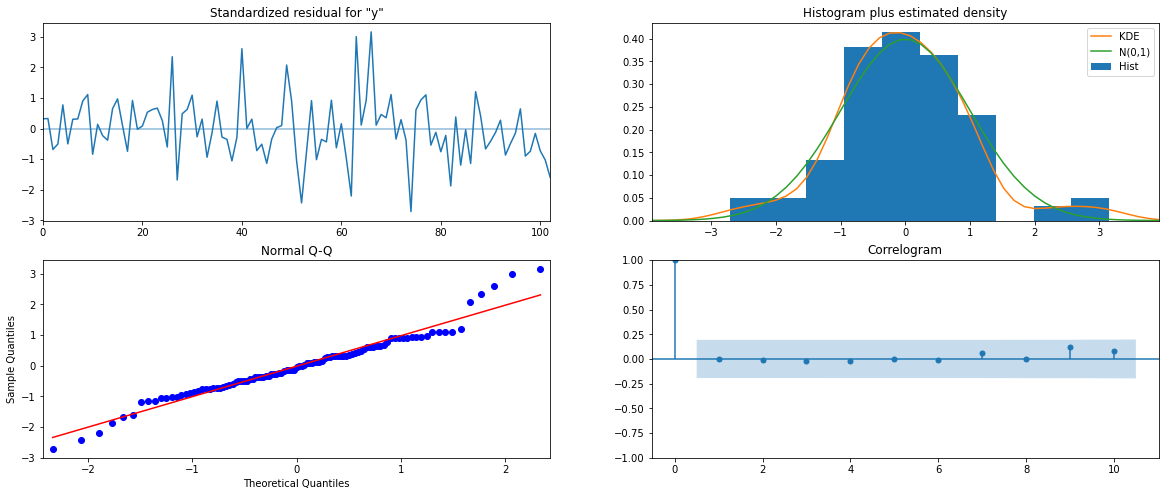

In [174]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [175]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [176]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1402.456997  375.355284     666.774159    2138.139836
1  1005.805320  393.144467     235.256324    1776.354316
2  1705.511497  393.584925     934.099220    2476.923775
3  1593.066043  403.996836     801.246793    2384.885292
4  1153.747987  404.048148     361.828169    1945.667805

In [177]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

790.8363495181111


In [178]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['auto SARIMA(2,1,3)(1,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)                 1374.336485
ARIMA(0,1,0)                 4779.154299
auto SARIMA(2,1,3)(1,1,3,6)   790.836350
auto SARIMA(2,1,3)(1,1,3,6)   790.836350

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [179]:
import itertools
p = q = range(0, 4)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 0, 3)(1, 0, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 0, 3)(2, 0, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 0, 0)(3, 0, 0, 12)
Model: (3, 0, 1)(3, 0, 1, 12)
Model: (3, 0, 2)(3, 0, 2, 12)
Model: (3, 0, 3)(3, 0, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [180]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [181]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2447.5387828489993
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2094.785599210927
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1815.8304642355697
SARIMA(0, 0, 0)x(0, 0, 3, 12) - AIC:4071.7972140651495
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1786.4850411919438
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1596.2586002542682
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:1428.135742313845


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(0, 1, 3, 12) - AIC:3571.217566901627
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1802.3841958898233
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1765.9902957951565
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:1602.6508528654683
SARIMA(0, 0, 0)x(1, 0, 3, 12) - AIC:3442.235319984906
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1615.0445907515473
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1598.2582087357487
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:1429.7362167409071


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(1, 1, 3, 12) - AIC:2794.823840301136
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:1616.3804986882144
SARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:1612.0535874420873
SARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:1596.0861886292298


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(2, 0, 3, 12) - AIC:2896.773943852539
SARIMA(0, 0, 0)x(2, 1, 0, 12) - AIC:1441.2182003596358
SARIMA(0, 0, 0)x(2, 1, 1, 12) - AIC:1443.0752316172066
SARIMA(0, 0, 0)x(2, 1, 2, 12) - AIC:1429.1328452770474


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(2, 1, 3, 12) - AIC:3368.0318351724104
SARIMA(0, 0, 0)x(3, 0, 0, 12) - AIC:1439.1849370925997
SARIMA(0, 0, 0)x(3, 0, 1, 12) - AIC:1440.0289312691698
SARIMA(0, 0, 0)x(3, 0, 2, 12) - AIC:1441.8755360996283


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(3, 0, 3, 12) - AIC:3321.9939119823453
SARIMA(0, 0, 0)x(3, 1, 0, 12) - AIC:1269.7700147845285
SARIMA(0, 0, 0)x(3, 1, 1, 12) - AIC:1271.2848520710013
SARIMA(0, 0, 0)x(3, 1, 2, 12) - AIC:1270.8427691537606


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(3, 1, 3, 12) - AIC:3522.8974807556488
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:2337.107015896133
SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2007.1951040609842
SARIMA(0, 0, 1)x(0, 0, 2, 12) - AIC:1745.42784533353


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(0, 0, 3, 12) - AIC:3362.9083721380557
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1767.3920589947845
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1577.8120190076688
SARIMA(0, 0, 1)x(0, 1, 2, 12) - AIC:1410.1567215348339


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(0, 1, 3, 12) - AIC:2877.270803354366
SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1797.498310290258
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1748.1569426021404
SARIMA(0, 0, 1)x(1, 0, 2, 12) - AIC:1580.2478940165295
SARIMA(0, 0, 1)x(1, 0, 3, 12) - AIC:3372.1706459788825
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1610.58607554721
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1579.6084311161815
SARIMA(0, 0, 1)x(1, 1, 2, 12) - AIC:1411.8978099953852


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(1, 1, 3, 12) - AIC:3209.0268717627673
SARIMA(0, 0, 1)x(2, 0, 0, 12) - AIC:1612.3592687690345
SARIMA(0, 0, 1)x(2, 0, 1, 12) - AIC:1609.5847960957808
SARIMA(0, 0, 1)x(2, 0, 2, 12) - AIC:1580.3902348609502


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(2, 0, 3, 12) - AIC:3095.4102436285007
SARIMA(0, 0, 1)x(2, 1, 0, 12) - AIC:1437.6855774146502
SARIMA(0, 0, 1)x(2, 1, 1, 12) - AIC:1439.517612979656
SARIMA(0, 0, 1)x(2, 1, 2, 12) - AIC:1412.486544121035


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(2, 1, 3, 12) - AIC:3410.2071335528058
SARIMA(0, 0, 1)x(3, 0, 0, 12) - AIC:1437.283469846067
SARIMA(0, 0, 1)x(3, 0, 1, 12) - AIC:1438.5586975201832
SARIMA(0, 0, 1)x(3, 0, 2, 12) - AIC:1440.566546805608


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(3, 0, 3, 12) - AIC:2574.9905772958773
SARIMA(0, 0, 1)x(3, 1, 0, 12) - AIC:1266.4228258210362
SARIMA(0, 0, 1)x(3, 1, 1, 12) - AIC:1268.2420626543944
SARIMA(0, 0, 1)x(3, 1, 2, 12) - AIC:1268.3774695068807


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(3, 1, 3, 12) - AIC:2927.9466944989013
SARIMA(0, 0, 2)x(0, 0, 0, 12) - AIC:2278.506917027129
SARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC:1969.3439982576756
SARIMA(0, 0, 2)x(0, 0, 2, 12) - AIC:1718.5070177768594


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(0, 0, 3, 12) - AIC:3779.5167144137363
SARIMA(0, 0, 2)x(0, 1, 0, 12) - AIC:1752.5326115472867
SARIMA(0, 0, 2)x(0, 1, 1, 12) - AIC:1566.0280736777352
SARIMA(0, 0, 2)x(0, 1, 2, 12) - AIC:1397.0370208740476


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(0, 1, 3, 12) - AIC:3627.1099296523835
SARIMA(0, 0, 2)x(1, 0, 0, 12) - AIC:1799.5082936514527
SARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC:1734.2740338645872
SARIMA(0, 0, 2)x(1, 0, 2, 12) - AIC:1568.0594642020646


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(1, 0, 3, 12) - AIC:3271.777426104321
SARIMA(0, 0, 2)x(1, 1, 0, 12) - AIC:1612.032293209766
SARIMA(0, 0, 2)x(1, 1, 1, 12) - AIC:1568.0079278923836
SARIMA(0, 0, 2)x(1, 1, 2, 12) - AIC:1398.924575687459


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(1, 1, 3, 12) - AIC:3478.6436286441194
SARIMA(0, 0, 2)x(2, 0, 0, 12) - AIC:1613.763144585685
SARIMA(0, 0, 2)x(2, 0, 1, 12) - AIC:1611.5920531551528
SARIMA(0, 0, 2)x(2, 0, 2, 12) - AIC:1567.8457919526993


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(2, 0, 3, 12) - AIC:2753.894459729399
SARIMA(0, 0, 2)x(2, 1, 0, 12) - AIC:1439.2912397918258
SARIMA(0, 0, 2)x(2, 1, 1, 12) - AIC:1441.1315347641007
SARIMA(0, 0, 2)x(2, 1, 2, 12) - AIC:1399.646072102537


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(2, 1, 3, 12) - AIC:3523.5513849289005
SARIMA(0, 0, 2)x(3, 0, 0, 12) - AIC:1439.2909377922815
SARIMA(0, 0, 2)x(3, 0, 1, 12) - AIC:1440.0174048318772
SARIMA(0, 0, 2)x(3, 0, 2, 12) - AIC:1441.9508185095492


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(3, 0, 3, 12) - AIC:2804.898837323412
SARIMA(0, 0, 2)x(3, 1, 0, 12) - AIC:1268.2151272700926
SARIMA(0, 0, 2)x(3, 1, 1, 12) - AIC:1270.0205066262133
SARIMA(0, 0, 2)x(3, 1, 2, 12) - AIC:1270.1531797096034


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)x(3, 1, 3, 12) - AIC:3603.7398694471
SARIMA(0, 0, 3)x(0, 0, 0, 12) - AIC:2253.1381901874797
SARIMA(0, 0, 3)x(0, 0, 1, 12) - AIC:1948.3477208204754
SARIMA(0, 0, 3)x(0, 0, 2, 12) - AIC:1699.4869589753923


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 3)x(0, 0, 3, 12) - AIC:3946.7898560162052
SARIMA(0, 0, 3)x(0, 1, 0, 12) - AIC:1739.0481510341288
SARIMA(0, 0, 3)x(0, 1, 1, 12) - AIC:1552.6925387749604
SARIMA(0, 0, 3)x(0, 1, 2, 12) - AIC:1381.4392656654613


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 3)x(0, 1, 3, 12) - AIC:2765.6259137382385
SARIMA(0, 0, 3)x(1, 0, 0, 12) - AIC:1801.0645578019103
SARIMA(0, 0, 3)x(1, 0, 1, 12) - AIC:1720.900023607419
SARIMA(0, 0, 3)x(1, 0, 2, 12) - AIC:1553.6388697190418


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 3)x(1, 0, 3, 12) - AIC:2856.235290484726
SARIMA(0, 0, 3)x(1, 1, 0, 12) - AIC:1612.2163136045465
SARIMA(0, 0, 3)x(1, 1, 1, 12) - AIC:1554.690435756508
SARIMA(0, 0, 3)x(1, 1, 2, 12) - AIC:1383.1336381730841


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 3)x(1, 1, 3, 12) - AIC:2912.7264853727684
SARIMA(0, 0, 3)x(2, 0, 0, 12) - AIC:1614.0480263716533
SARIMA(0, 0, 3)x(2, 0, 1, 12) - AIC:1616.0556257637954
SARIMA(0, 0, 3)x(2, 0, 2, 12) - AIC:1554.391235327646


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 3)x(2, 0, 3, 12) - AIC:2599.5869186885957
SARIMA(0, 0, 3)x(2, 1, 0, 12) - AIC:1438.6004393743497
SARIMA(0, 0, 3)x(2, 1, 1, 12) - AIC:1440.5148861977814
SARIMA(0, 0, 3)x(2, 1, 2, 12) - AIC:1384.6522778693202


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 3)x(2, 1, 3, 12) - AIC:3130.2892833277665
SARIMA(0, 0, 3)x(3, 0, 0, 12) - AIC:1438.5793275428957
SARIMA(0, 0, 3)x(3, 0, 1, 12) - AIC:1440.125119382049
SARIMA(0, 0, 3)x(3, 0, 2, 12) - AIC:1442.1254622789538


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 3)x(3, 0, 3, 12) - AIC:2592.9929909974812
SARIMA(0, 0, 3)x(3, 1, 0, 12) - AIC:1268.555496725602
SARIMA(0, 0, 3)x(3, 1, 1, 12) - AIC:1270.4608646984818
SARIMA(0, 0, 3)x(3, 1, 2, 12) - AIC:1270.5507786018775


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 3)x(3, 1, 3, 12) - AIC:2134.7157345162195
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640234443
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:7364.552978196196
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334679266
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574254655


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:3658.008274846777
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456672
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791944


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3847.606384799324
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.377816766144
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.324390819106
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621306467


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:3651.0518716176484
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415861082
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920754


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4176.280132325633
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.500098186662
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.9911553652719


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:3834.0215688843837
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625834
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530065705


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:5101.775529446155
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:1289.2398197439918
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:1291.2448875094153
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:1288.6070380250599
SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:4686.533701863075
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850584
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566464
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957284438
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:7291.556512239836
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1760.6565719828557
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.663923423005
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1399.108384667984


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 1, 3, 12) - AIC:3610.548715688111
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838555
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193740335
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144332806


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3226.840429960204
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1602.8594819023883
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1570.8550259196059
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1400.670952413764


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 3, 12) - AIC:3485.8547960259652
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176164
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084897515
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824244179


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3253.177360573036
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1428.2448811159443
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1429.6168027963392
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:1402.63858885066
SARIMA(0, 1, 1)x(2, 1, 3, 12) - AIC:3169.115306077184
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679615328
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.87279905446
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5891876658195


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:5134.115646915257
SARIMA(0, 1, 1)x(3, 1, 0, 12) - AIC:1255.5784542932297
SARIMA(0, 1, 1)x(3, 1, 1, 12) - AIC:1257.455856858966
SARIMA(0, 1, 1)x(3, 1, 2, 12) - AIC:1258.292512556489


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 1, 3, 12) - AIC:3541.9344366534565
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687017
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007201514
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890444405
SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:7212.9668812171
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1741.3207220431611
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:1554.7429039622102
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:1382.4842540785394


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 1, 3, 12) - AIC:3382.021649192534
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332160769
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675077971956
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605065816516


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3842.270510911413
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:1601.7587293000813
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:1556.1559716711254
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:1384.3988672022244


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 1, 3, 12) - AIC:2978.3873465485585
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774426328
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438800512209


KeyboardInterrupt: 

In [182]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
188  (0, 1, 1)  (3, 1, 0, 12)  1255.578454
189  (0, 1, 1)  (3, 1, 1, 12)  1257.455857
190  (0, 1, 1)  (3, 1, 2, 12)  1258.292513
60   (0, 0, 1)  (3, 1, 0, 12)  1266.422826
92   (0, 0, 2)  (3, 1, 0, 12)  1268.215127

In [183]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -596.641
Date:                             Sun, 19 Sep 2021   AIC                           1213.283
Time:                                     10:19:41   BIC                           1237.103
Sample:                                          0   HQIC                          1222.833
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6138      0.176     -9.174      0.000      -1.959      -1.269
ar.L2         -0.6116      

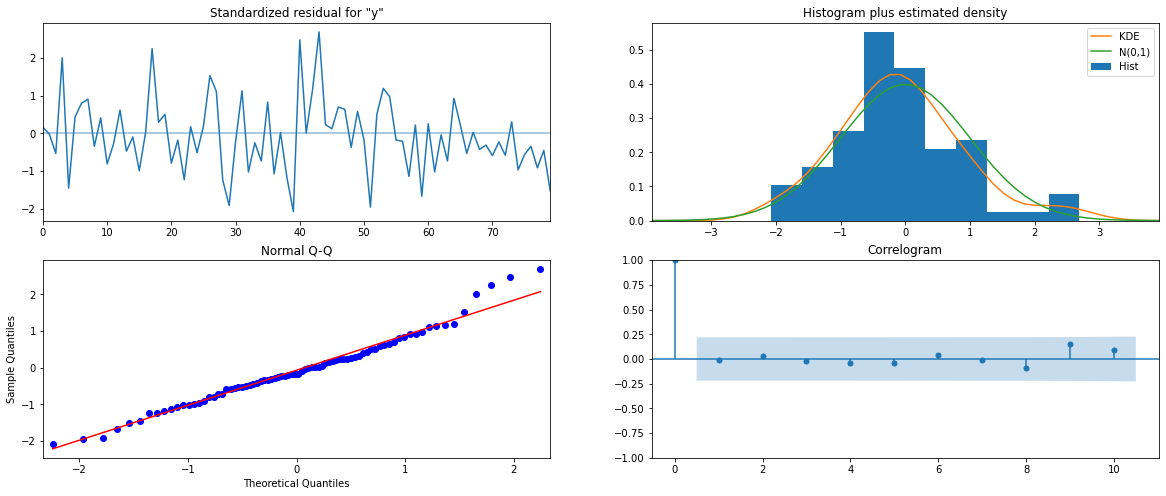

In [184]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [185]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [186]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1430.334371  431.199546     585.198792    2275.469951
1  1540.190467  458.422144     641.699576    2438.681359
2  1707.264337  460.187094     805.314207    2609.214468
3  1858.730495  466.755947     943.905649    2773.555340
4  1501.443936  467.055647     586.031688    2416.856184

In [187]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

331.71680939892525


In [188]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['auto SARIMA(3,1,3)(3,1,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)                  1374.336485
ARIMA(0,1,0)                  4779.154299
auto SARIMA(2,1,3)(1,1,3,6)    790.836350
auto SARIMA(2,1,3)(1,1,3,6)    790.836350
auto SARIMA(3,1,3)(3,1,0,12)   331.716809

### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


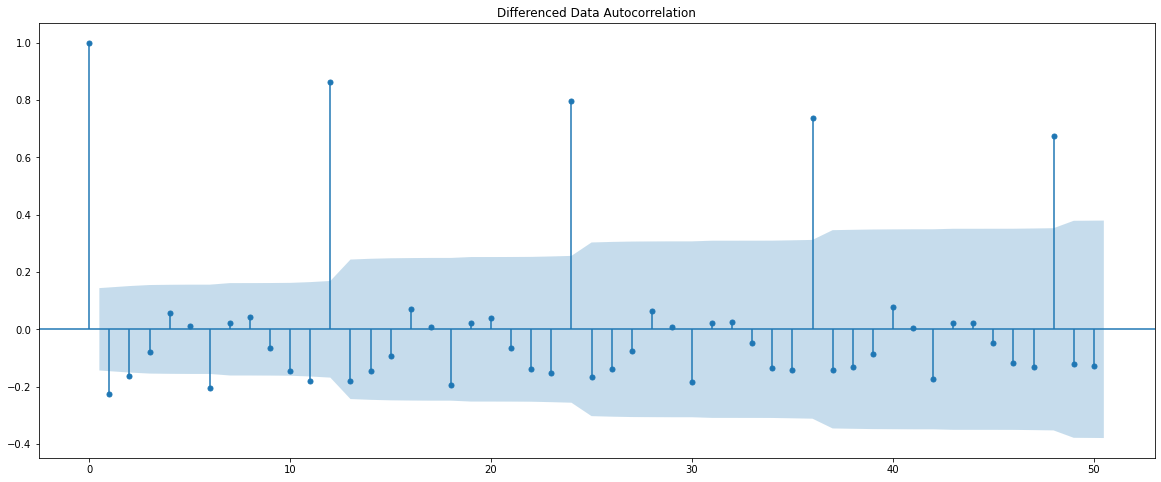

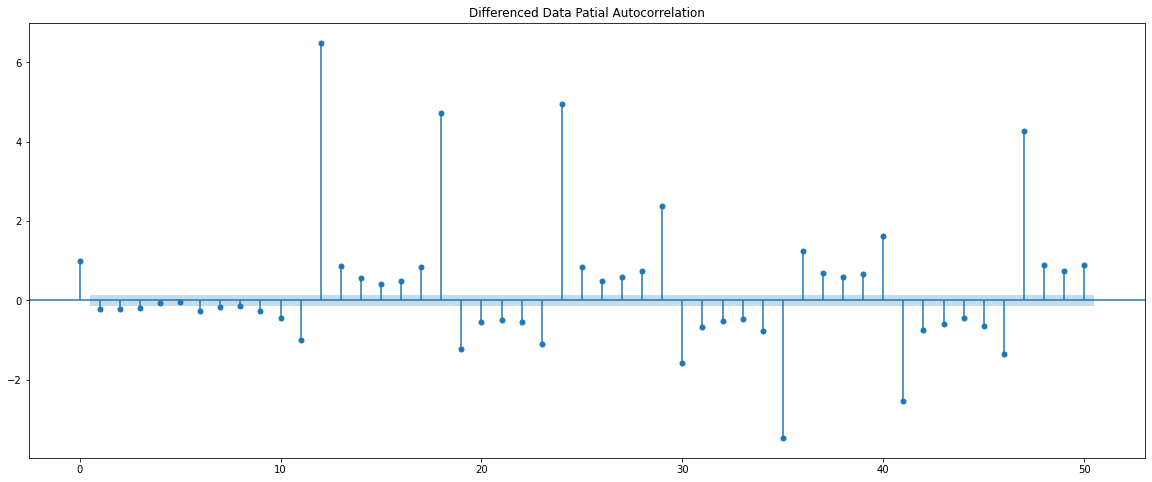

In [189]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [190]:
## We see that our ACF plot at the seasonal interval (6) does not taper off. 
## So, we go ahead and take a seasonal differencing of the original series.
## Before that let us look at the original series.

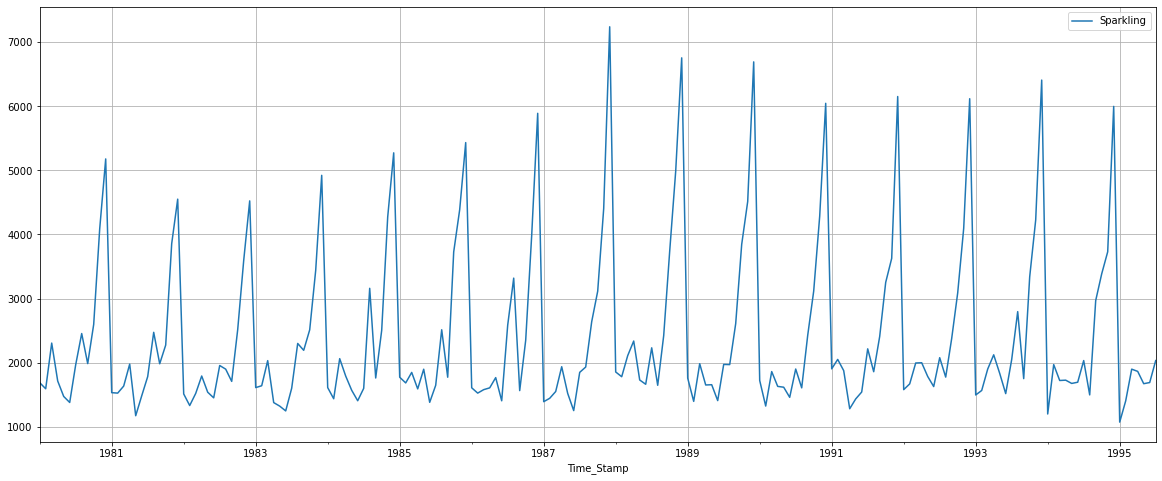

In [191]:
df.plot()
plt.grid();

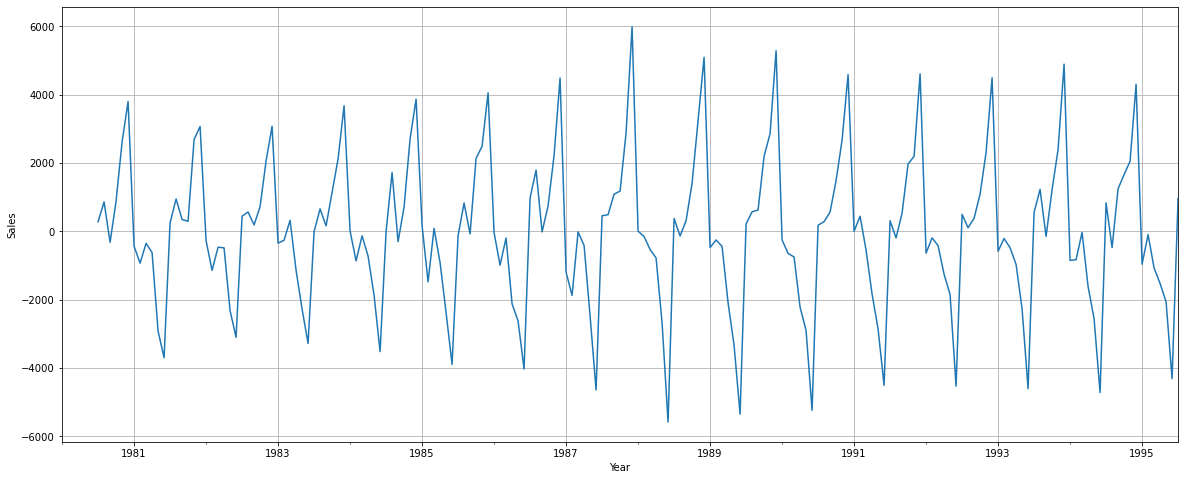

In [192]:
(df['Sparkling'].diff(6)).plot()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid();

In [193]:
# Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

In [194]:
# Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

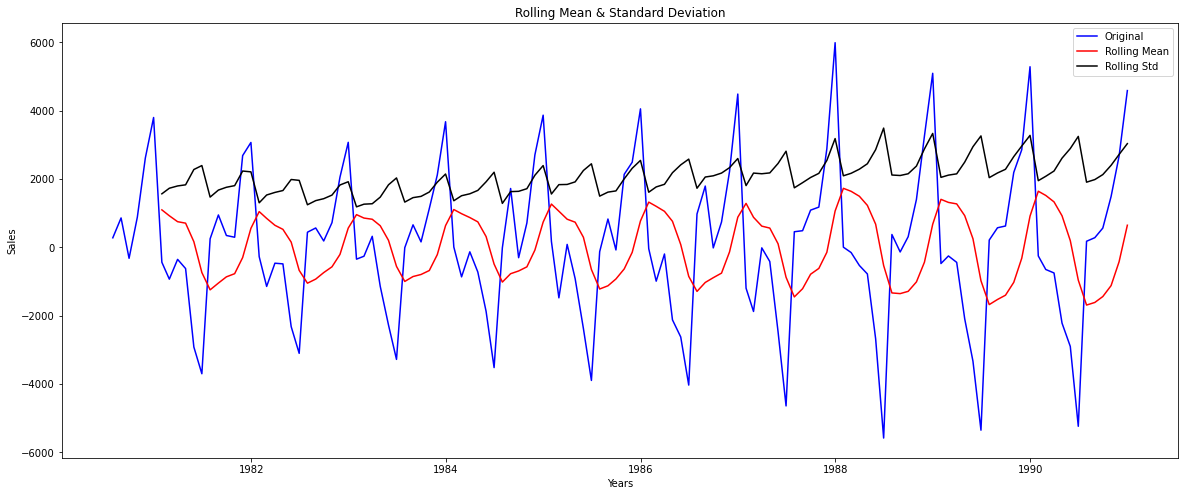

Results of Dickey-Fuller Test:
Test Statistic                -8.181919e+00
p-value                        8.088278e-13
#Lags Used                     6.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [195]:
test_stationarity((train['Sparkling'].diff(6).dropna()))

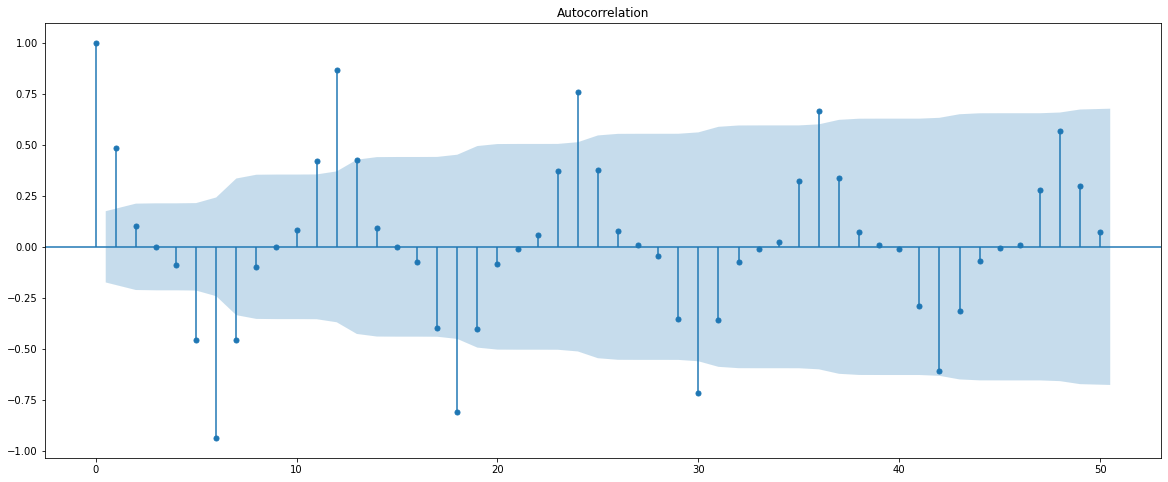

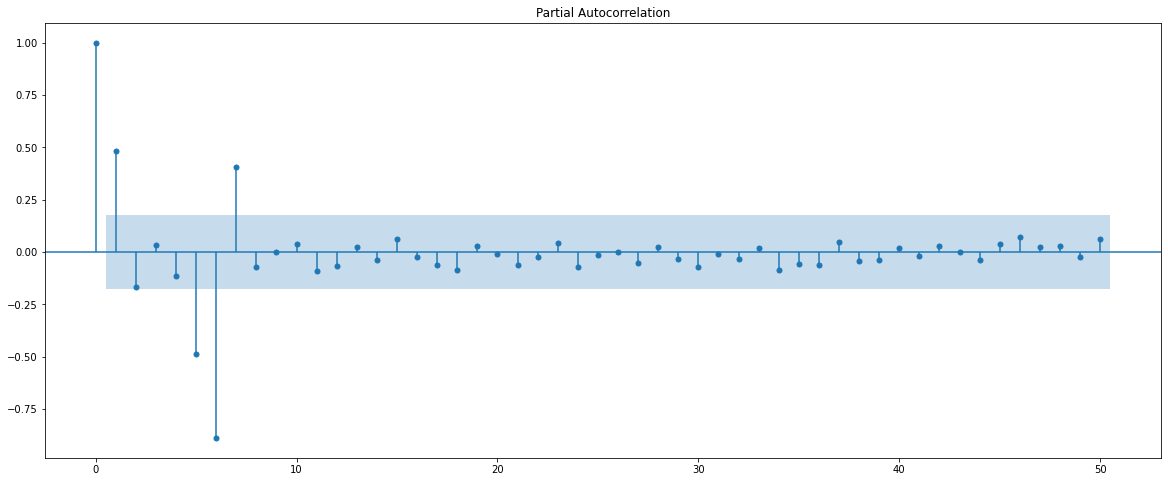

In [196]:
plot_acf((train['Sparkling'].diff(6).dropna()),lags=50)
plot_pacf((train['Sparkling'].diff(6).dropna()),lags=50, method= "ywmle");

In [197]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1,1,1,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 6)   Log Likelihood                -909.770
Date:                             Sun, 19 Sep 2021   AIC                           1825.540
Time:                                     10:20:12   BIC                           1833.853
Sample:                                          0   HQIC                          1828.915
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.9688      0.028    -34.608      0.000      -1.024      -0.914
ma.S.L6       -0.1158      

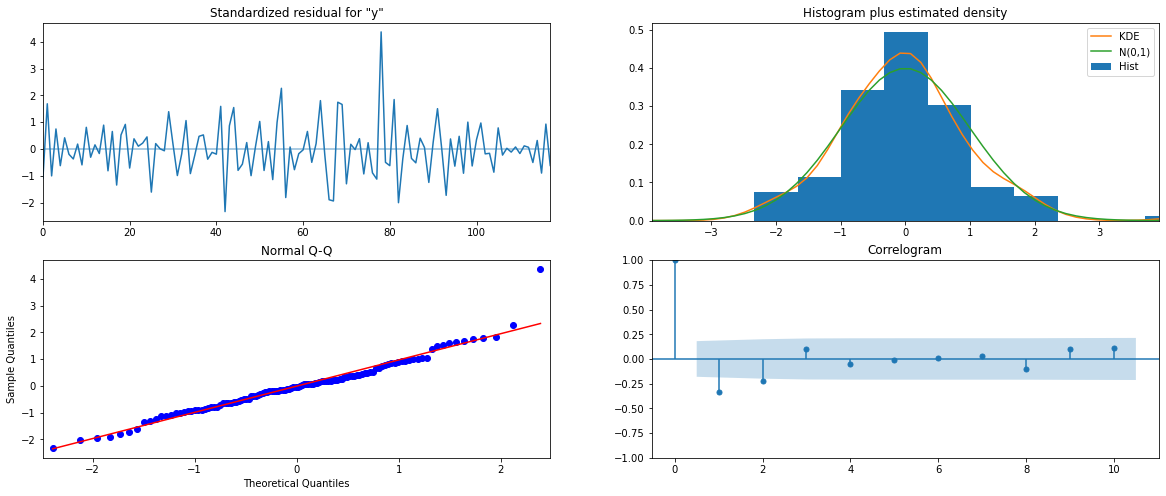

In [198]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [199]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [200]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean      mean_se  mean_ci_lower  mean_ci_upper
0  1237.796863   550.579969     158.679952    2316.913773
1   874.151202   778.637660    -651.950568    2400.252973
2  1400.658587   953.632481    -468.426730    3269.743904
3  1255.703692  1101.159939    -902.530129    3413.937514
4  1220.342051  1231.134239   -1192.636717    3633.320819

In [201]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

1472.2375446813044


In [202]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['manual SARIMA(0,1,0)(1,1,1,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)                   1374.336485
ARIMA(0,1,0)                   4779.154299
auto SARIMA(2,1,3)(1,1,3,6)     790.836350
auto SARIMA(2,1,3)(1,1,3,6)     790.836350
auto SARIMA(3,1,3)(3,1,0,12)    331.716809
manual SARIMA(0,1,0)(1,1,1,6)  1472.237545

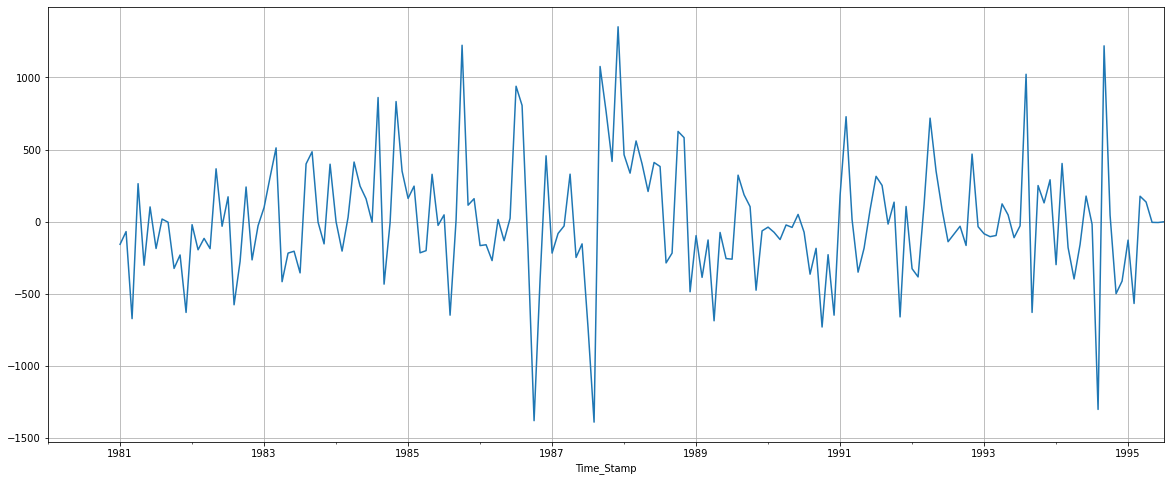

In [203]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

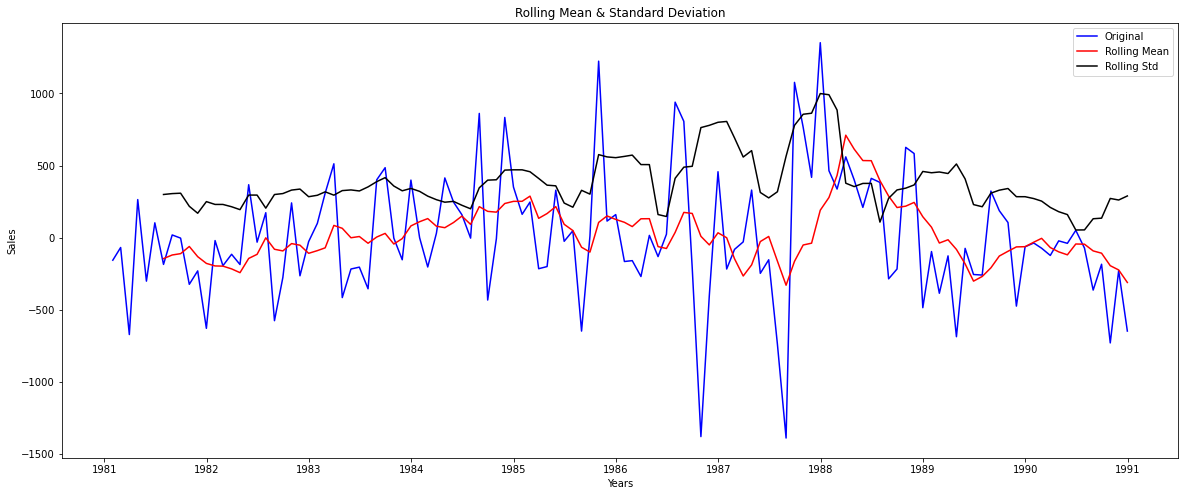

Results of Dickey-Fuller Test:
Test Statistic                  -3.136812
p-value                          0.023946
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [204]:
test_stationarity((train['Sparkling'].diff(12).dropna()))

Text(0, 0.5, 'Percentage')

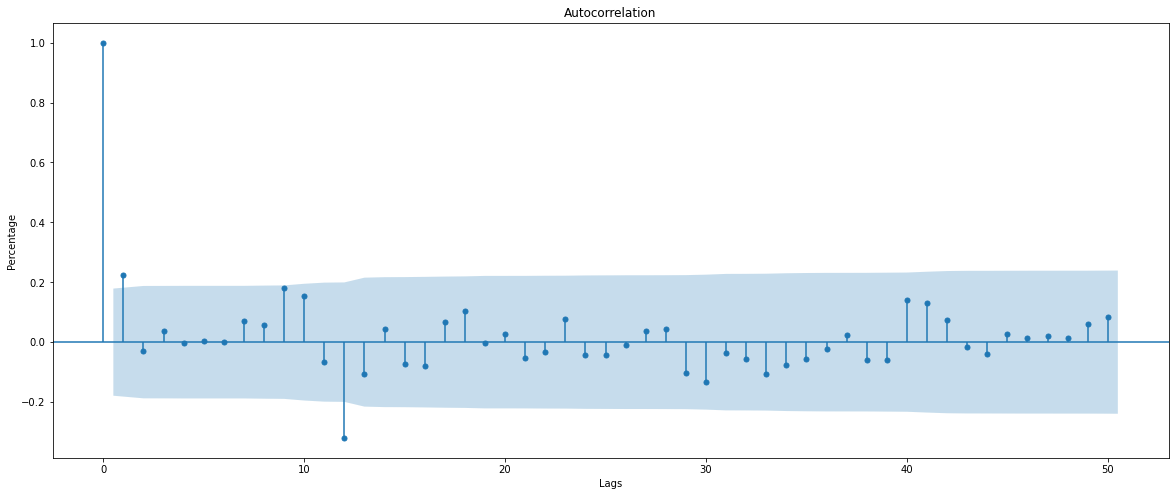

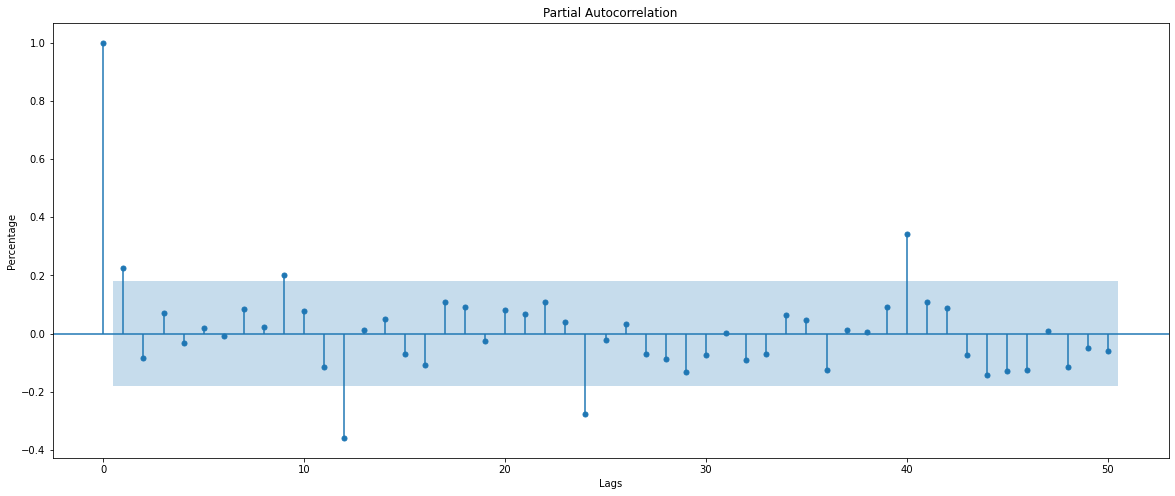

In [205]:
plot_acf((train['Sparkling'].diff(12).dropna()),lags=50)
plt.xlabel('Lags')
plt.ylabel('Percentage')
plot_pacf((train['Sparkling'].diff(12).dropna()),lags=50);
plt.xlabel('Lags')
plt.ylabel('Percentage')

In [206]:
import statsmodels.api as sm

manual_SARIMA_20 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1,2,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_20 = manual_SARIMA_20.fit(maxiter=1000)
print(results_manual_SARIMA_20.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 2, [1], 12)   Log Likelihood                -733.205
Date:                              Sun, 19 Sep 2021   AIC                           1472.410
Time:                                      10:20:42   BIC                           1480.039
Sample:                                           0   HQIC                          1475.491
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3021      0.087     -3.463      0.001      -0.473      -0.131
ma.S.L12      -1.00

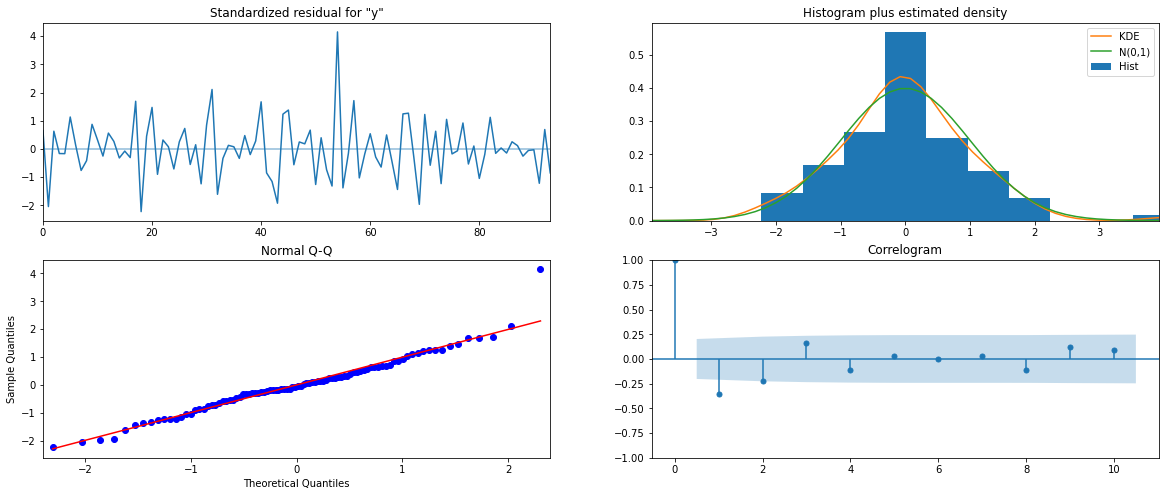

In [207]:
results_manual_SARIMA_20.plot_diagnostics()
plt.show()

In [208]:
predicted_manual_SARIMA_20 = results_manual_SARIMA_20.get_forecast(steps=len(test))

In [209]:
predicted_manual_SARIMA_20.summary_frame(alpha=0.05).head()

y        mean      mean_se  mean_ci_lower  mean_ci_upper
0  640.871475   564.710402    -465.940575    1747.683524
1  209.156416   797.341794   -1353.604784    1771.917617
2  773.557168   976.017436   -1139.401856    2686.516191
3  518.178122  1126.705878   -1690.124819    2726.481063
4  549.521673  1259.492848   -1919.038947    3018.082294

In [210]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_20.predicted_mean,squared=False)
print(rmse)

3592.0073329585825


In [211]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['manual SARIMA(0,1,0)(1,2,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,2)                    1374.336485
ARIMA(0,1,0)                    4779.154299
auto SARIMA(2,1,3)(1,1,3,6)      790.836350
auto SARIMA(2,1,3)(1,1,3,6)      790.836350
auto SARIMA(3,1,3)(3,1,0,12)     331.716809
manual SARIMA(0,1,0)(1,1,1,6)   1472.237545
manual SARIMA(0,1,0)(1,2,1,12)  3592.007333

In [212]:
print('Sorted by RMSE values :','\n',)
resultsDf.sort_values(by=['RMSE'])

Sorted by RMSE values : 



RMSE
auto SARIMA(3,1,3)(3,1,0,12)     331.716809
auto SARIMA(2,1,3)(1,1,3,6)      790.836350
auto SARIMA(2,1,3)(1,1,3,6)      790.836350
ARIMA(2,1,2)                    1374.336485
manual SARIMA(0,1,0)(1,1,1,6)   1472.237545
manual SARIMA(0,1,0)(1,2,1,12)  3592.007333
ARIMA(0,1,0)                    4779.154299

### Building the most optimum model on the Full Data.

In [213]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'], 
                                order=(3,1,3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -998.042
Date:                             Sun, 19 Sep 2021   AIC                           2016.083
Time:                                     10:21:11   BIC                           2045.136
Sample:                                 01-31-1980   HQIC                          2027.890
                                      - 07-31-1995                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0053      0.104     -9.705      0.000      -1.208      -0.802
ar.L2         -0.8252      

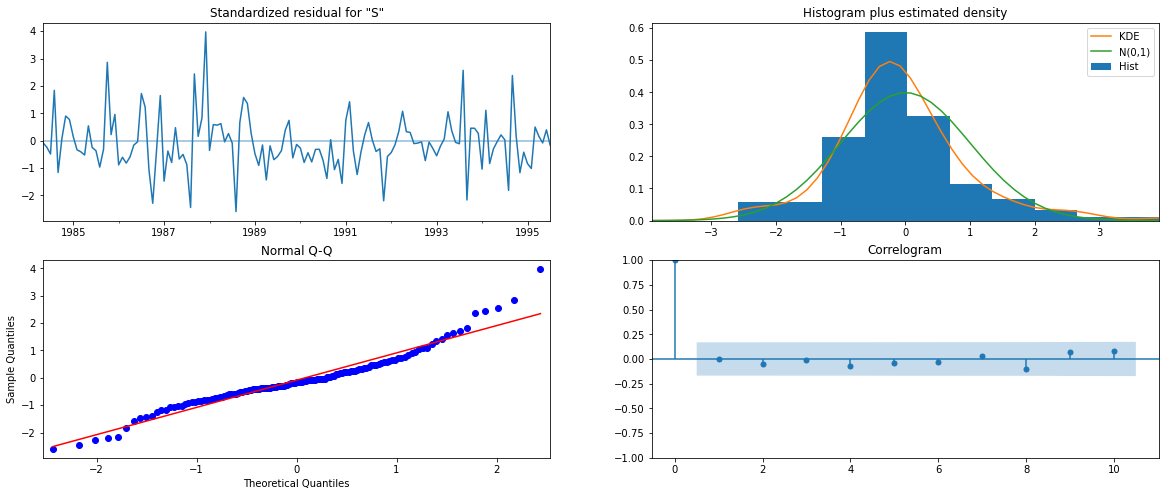

In [214]:
results_full_data_model.plot_diagnostics();

In [215]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [216]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1930.557876  388.407874    1169.292432    2691.823320
1995-09-30  2399.837441  395.226782    1625.207182    3174.467700
1995-10-31  3332.411143  395.574128    2557.100098    4107.722188
1995-11-30  3870.319866  395.584962    3094.987587    4645.652145
1995-12-31  6090.799818  396.783879    5313.117704    6868.481931

In [217]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 612.7770567553058


In [218]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

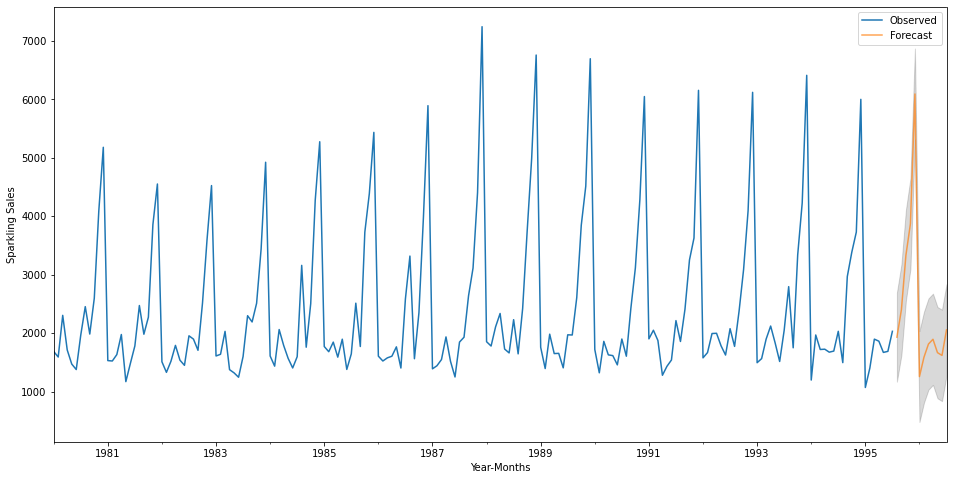

In [219]:
# plot the forecast along with the confidence band

plt.figure(figsize=(16,8))
axis = df['Sparkling'].plot(label='Observed')

pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')

plt.show()